In [1]:
import os
import os.path as op
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy.ma as ma
from scipy import stats

## OGD Severity Data

In [2]:
file_list = [] # This is going to be the list of all filenames that will be included in the analysis

path = '~/Desktop/MPT_Data/OGD_Severity_CSVs/' # The folder where the Deff csv files are located

treatments = ['NT', 'OGD_0_5h', 'OGD_1_5h', 'OGD_3h']
regions = ['cortex', 'striatum']

vids = 5
slices = 3
for treat in treatments:
    if treat == 'NT':
        for slic in range(1, slices):
            if slic == 1:
                for reg in regions:
                    if reg == 'cortex':
                        file_list.append('{}_slice_{}_{}_vid_7'.format(treat, slic, reg))
                        file_list.append('{}_slice_{}_{}_vid_9'.format(treat, slic, reg))
                        file_list.append('{}_slice_{}_{}_vid_10'.format(treat, slic, reg))
                    else:
                        for vid in range(1, vids+1):
                            file_list.append('{}_slice_{}_{}_vid_{}'.format(treat, slic, reg, vid))
                            
            else:
                for reg in regions:
                    if reg == 'cortex':
                        file_list.append('{}_slice_{}_{}_vid_1'.format(treat, slic, reg, vid))
                        file_list.append('{}_slice_{}_{}_vid_2'.format(treat, slic, reg, vid))
                        file_list.append('{}_slice_{}_{}_vid_3'.format(treat, slic, reg, vid))
                        file_list.append('{}_slice_{}_{}_vid_5'.format(treat, slic, reg, vid))
                    else:
                        for vid in range(1, vids+1):
                            file_list.append('{}_slice_{}_{}_vid_{}'.format(treat, slic, reg, vid))
        
    elif treat == 'OGD_0_5h' or treat == 'OGD_1_5h':
        for slic in range(1, slices+1):
            for reg in regions:
                for vid in range(1, vids+1):
                    file_list.append('{}_slice_{}_{}_vid_{}'.format(treat, slic, reg, vid))
    
    else:
        for slic in range(1, slices+1):
            if slic == 1:
                for reg in regions:
                    if reg == 'cortex':
                        for vid in range(1, vids+1):
                            file_list.append('{}_slice_{}_{}_vid_{}'.format(treat, slic, reg, vid))
                    else:
                        for vid in range(1, vids):
                            file_list.append('{}_slice_{}_{}_vid_{}'.format(treat, slic, reg, vid))
            elif slic == 2:
                for reg in regions:
                    for vid in range(1, vids+1):
                        file_list.append('{}_slice_{}_{}_vid_{}'.format(treat, slic, reg, vid))
            else:
                for reg in regions:
                    if reg == 'cortex':
                        for vid in range(1, vids+1):
                            file_list.append('{}_slice_{}_{}_vid_{}'.format(treat, slic, reg, vid))
                    else:
                        for vid in range(2,4):
                            file_list.append('{}_slice_{}_{}_vid_{}'.format(treat, slic, reg, vid))
                

In [3]:
file_list

['NT_slice_1_cortex_vid_7',
 'NT_slice_1_cortex_vid_9',
 'NT_slice_1_cortex_vid_10',
 'NT_slice_1_striatum_vid_1',
 'NT_slice_1_striatum_vid_2',
 'NT_slice_1_striatum_vid_3',
 'NT_slice_1_striatum_vid_4',
 'NT_slice_1_striatum_vid_5',
 'NT_slice_2_cortex_vid_1',
 'NT_slice_2_cortex_vid_2',
 'NT_slice_2_cortex_vid_3',
 'NT_slice_2_cortex_vid_5',
 'NT_slice_2_striatum_vid_1',
 'NT_slice_2_striatum_vid_2',
 'NT_slice_2_striatum_vid_3',
 'NT_slice_2_striatum_vid_4',
 'NT_slice_2_striatum_vid_5',
 'OGD_0_5h_slice_1_cortex_vid_1',
 'OGD_0_5h_slice_1_cortex_vid_2',
 'OGD_0_5h_slice_1_cortex_vid_3',
 'OGD_0_5h_slice_1_cortex_vid_4',
 'OGD_0_5h_slice_1_cortex_vid_5',
 'OGD_0_5h_slice_1_striatum_vid_1',
 'OGD_0_5h_slice_1_striatum_vid_2',
 'OGD_0_5h_slice_1_striatum_vid_3',
 'OGD_0_5h_slice_1_striatum_vid_4',
 'OGD_0_5h_slice_1_striatum_vid_5',
 'OGD_0_5h_slice_2_cortex_vid_1',
 'OGD_0_5h_slice_2_cortex_vid_2',
 'OGD_0_5h_slice_2_cortex_vid_3',
 'OGD_0_5h_slice_2_cortex_vid_4',
 'OGD_0_5h_slice_

In [4]:
len(file_list)

103

In [4]:
# Assigning variables
k = 1.3806503e-23 # m^2 kg s^-2 K
#T = 310.15 # K
T = 293.15 # K
mu = 0.001 # kg m^-1 s^-1

r_s = 26 # nm
r_f = 0.15 # nm

Do = k*T/(6*math.pi*mu*r_s*1e-9)*1e12 # um^2/s
print(Do)

8.25846094056375


In [5]:
OGD_3h_files

NameError: name 'OGD_3h_files' is not defined

In [6]:
NT_cortex_files = file_list[0:3]+file_list[8:12]
NT_striatum_files = file_list[3:8]+file_list[12:17]
NT_files = NT_cortex_files + NT_striatum_files
OGD_0_5h_cortex_files = file_list[17:22]+file_list[27:32]+file_list[37:42]
OGD_0_5h_striatum_files = file_list[22:27]+file_list[32:37]+file_list[42:47]
OGD_0_5h_files = OGD_0_5h_cortex_files + OGD_0_5h_striatum_files
OGD_1_5h_cortex_files = file_list[47:52]+file_list[57:62]+file_list[67:72]
OGD_1_5h_striatum_files = file_list[52:57]+file_list[62:67]+file_list[72:77]
OGD_1_5h_files = OGD_1_5h_cortex_files + OGD_1_5h_striatum_files
OGD_3h_cortex_files = file_list[77:82]+file_list[86:91]+file_list[96:101]
OGD_3h_striatum_files = file_list[82:86]+file_list[91:96]+file_list[101:103]
OGD_3h_files = OGD_3h_cortex_files + OGD_3h_striatum_files

In [7]:
Deff_vals_NT_cortex = pd.DataFrame()

for file in NT_cortex_files:
    temp = pd.read_csv(path+'{}_stats.csv'.format(file))
    Deff_vals_NT_cortex = pd.concat([Deff_vals_NT_cortex, temp], ignore_index=True)

Deff_vals_NT_cortex.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_NT_cortex['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_NT_cortex['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_NT_cortex = Deff_vals_NT_cortex.dropna()
Deff_vals_NT_cortex = Deff_vals_NT_cortex.reset_index(drop=True)

Deff_vals_NT_striatum = pd.DataFrame()

for file in NT_striatum_files:
    temp = pd.read_csv(path+'{}_stats.csv'.format(file))
    Deff_vals_NT_striatum = pd.concat([Deff_vals_NT_striatum, temp], ignore_index=True)

Deff_vals_NT_striatum.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_NT_striatum['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_NT_striatum['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_NT_striatum = Deff_vals_NT_striatum.dropna()
Deff_vals_NT_striatum = Deff_vals_NT_striatum.reset_index(drop=True)

Deff_vals_NT = pd.DataFrame()

for file in NT_files:
    temp = pd.read_csv(path+'{}_stats.csv'.format(file))
    Deff_vals_NT = pd.concat([Deff_vals_NT, temp], ignore_index=True)

Deff_vals_NT.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_NT['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_NT['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_NT = Deff_vals_NT.dropna()
Deff_vals_NT = Deff_vals_NT.reset_index(drop=True)


In [8]:
Deff_vals_OGD_0_5h_cortex = pd.DataFrame()

for file in OGD_0_5h_cortex_files:
    temp = pd.read_csv(path+'{}_stats.csv'.format(file))
    Deff_vals_OGD_0_5h_cortex = pd.concat([Deff_vals_OGD_0_5h_cortex, temp], ignore_index=True)

Deff_vals_OGD_0_5h_cortex.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_OGD_0_5h_cortex['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_OGD_0_5h_cortex['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_OGD_0_5h_cortex = Deff_vals_OGD_0_5h_cortex.dropna()
Deff_vals_OGD_0_5h_cortex = Deff_vals_OGD_0_5h_cortex.reset_index(drop=True)

Deff_vals_OGD_0_5h_striatum = pd.DataFrame()

for file in OGD_0_5h_striatum_files:
    temp = pd.read_csv(path+'{}_stats.csv'.format(file))
    Deff_vals_OGD_0_5h_striatum = pd.concat([Deff_vals_OGD_0_5h_striatum, temp], ignore_index=True)

Deff_vals_OGD_0_5h_striatum.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_OGD_0_5h_striatum['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_OGD_0_5h_striatum['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_OGD_0_5h_striatum = Deff_vals_OGD_0_5h_striatum.dropna()
Deff_vals_OGD_0_5h_striatum = Deff_vals_OGD_0_5h_striatum.reset_index(drop=True)

Deff_vals_OGD_0_5h = pd.DataFrame()

for file in OGD_0_5h_files:
    temp = pd.read_csv(path+'{}_stats.csv'.format(file))
    Deff_vals_OGD_0_5h = pd.concat([Deff_vals_OGD_0_5h, temp], ignore_index=True)

Deff_vals_OGD_0_5h.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_OGD_0_5h['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_OGD_0_5h['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_OGD_0_5h = Deff_vals_OGD_0_5h.dropna()
Deff_vals_OGD_0_5h = Deff_vals_OGD_0_5h.reset_index(drop=True)


In [9]:
Deff_vals_OGD_1_5h_cortex = pd.DataFrame()

for file in OGD_1_5h_cortex_files:
    temp = pd.read_csv(path+'{}_stats.csv'.format(file))
    Deff_vals_OGD_1_5h_cortex = pd.concat([Deff_vals_OGD_1_5h_cortex, temp], ignore_index=True)

Deff_vals_OGD_1_5h_cortex.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_OGD_1_5h_cortex['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_OGD_1_5h_cortex['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_OGD_1_5h_cortex = Deff_vals_OGD_1_5h_cortex.dropna()
Deff_vals_OGD_1_5h_cortex = Deff_vals_OGD_1_5h_cortex.reset_index(drop=True)

Deff_vals_OGD_1_5h_striatum = pd.DataFrame()

for file in OGD_1_5h_striatum_files:
    temp = pd.read_csv(path+'{}_stats.csv'.format(file))
    Deff_vals_OGD_1_5h_striatum = pd.concat([Deff_vals_OGD_1_5h_striatum, temp], ignore_index=True)

Deff_vals_OGD_1_5h_striatum.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_OGD_1_5h_striatum['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_OGD_1_5h_striatum['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_OGD_1_5h_striatum = Deff_vals_OGD_1_5h_striatum.dropna()
Deff_vals_OGD_1_5h_striatum = Deff_vals_OGD_1_5h_striatum.reset_index(drop=True)

Deff_vals_OGD_1_5h = pd.DataFrame()

for file in OGD_1_5h_files:
    temp = pd.read_csv(path+'{}_stats.csv'.format(file))
    Deff_vals_OGD_1_5h = pd.concat([Deff_vals_OGD_1_5h, temp], ignore_index=True)

Deff_vals_OGD_1_5h.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_OGD_1_5h['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_OGD_1_5h['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_OGD_1_5h = Deff_vals_OGD_1_5h.dropna()
Deff_vals_OGD_1_5h = Deff_vals_OGD_1_5h.reset_index(drop=True)


In [10]:
Deff_vals_OGD_3h_cortex = pd.DataFrame()

for file in OGD_3h_cortex_files:
    temp = pd.read_csv(path+'{}_stats.csv'.format(file))
    Deff_vals_OGD_3h_cortex = pd.concat([Deff_vals_OGD_3h_cortex, temp], ignore_index=True)

Deff_vals_OGD_3h_cortex.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_OGD_3h_cortex['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_OGD_3h_cortex['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_OGD_3h_cortex = Deff_vals_OGD_3h_cortex.dropna()
Deff_vals_OGD_3h_cortex = Deff_vals_OGD_3h_cortex.reset_index(drop=True)

Deff_vals_OGD_3h_striatum = pd.DataFrame()

for file in OGD_3h_striatum_files:
    temp = pd.read_csv(path+'{}_stats.csv'.format(file))
    Deff_vals_OGD_3h_striatum = pd.concat([Deff_vals_OGD_3h_striatum, temp], ignore_index=True)

Deff_vals_OGD_3h_striatum.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_OGD_3h_striatum['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_OGD_3h_striatum['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_OGD_3h_striatum = Deff_vals_OGD_3h_striatum.dropna()
Deff_vals_OGD_3h_striatum = Deff_vals_OGD_3h_striatum.reset_index(drop=True)

Deff_vals_OGD_3h = pd.DataFrame()

for file in OGD_3h_files:
    temp = pd.read_csv(path+'{}_stats.csv'.format(file))
    Deff_vals_OGD_3h = pd.concat([Deff_vals_OGD_3h, temp], ignore_index=True)

Deff_vals_OGD_3h.rename(columns={'0': "Deff [um^2/s]"}, inplace=True)
Deff_vals_OGD_3h['Pore size [nm]'] = 2*((r_s+r_f)/((-4/math.pi*(np.log((Deff_vals_OGD_3h['Deff [um^2/s]'])/Do)))**(1/2))-r_f)
Deff_vals_OGD_3h = Deff_vals_OGD_3h.dropna()
Deff_vals_OGD_3h = Deff_vals_OGD_3h.reset_index(drop=True)

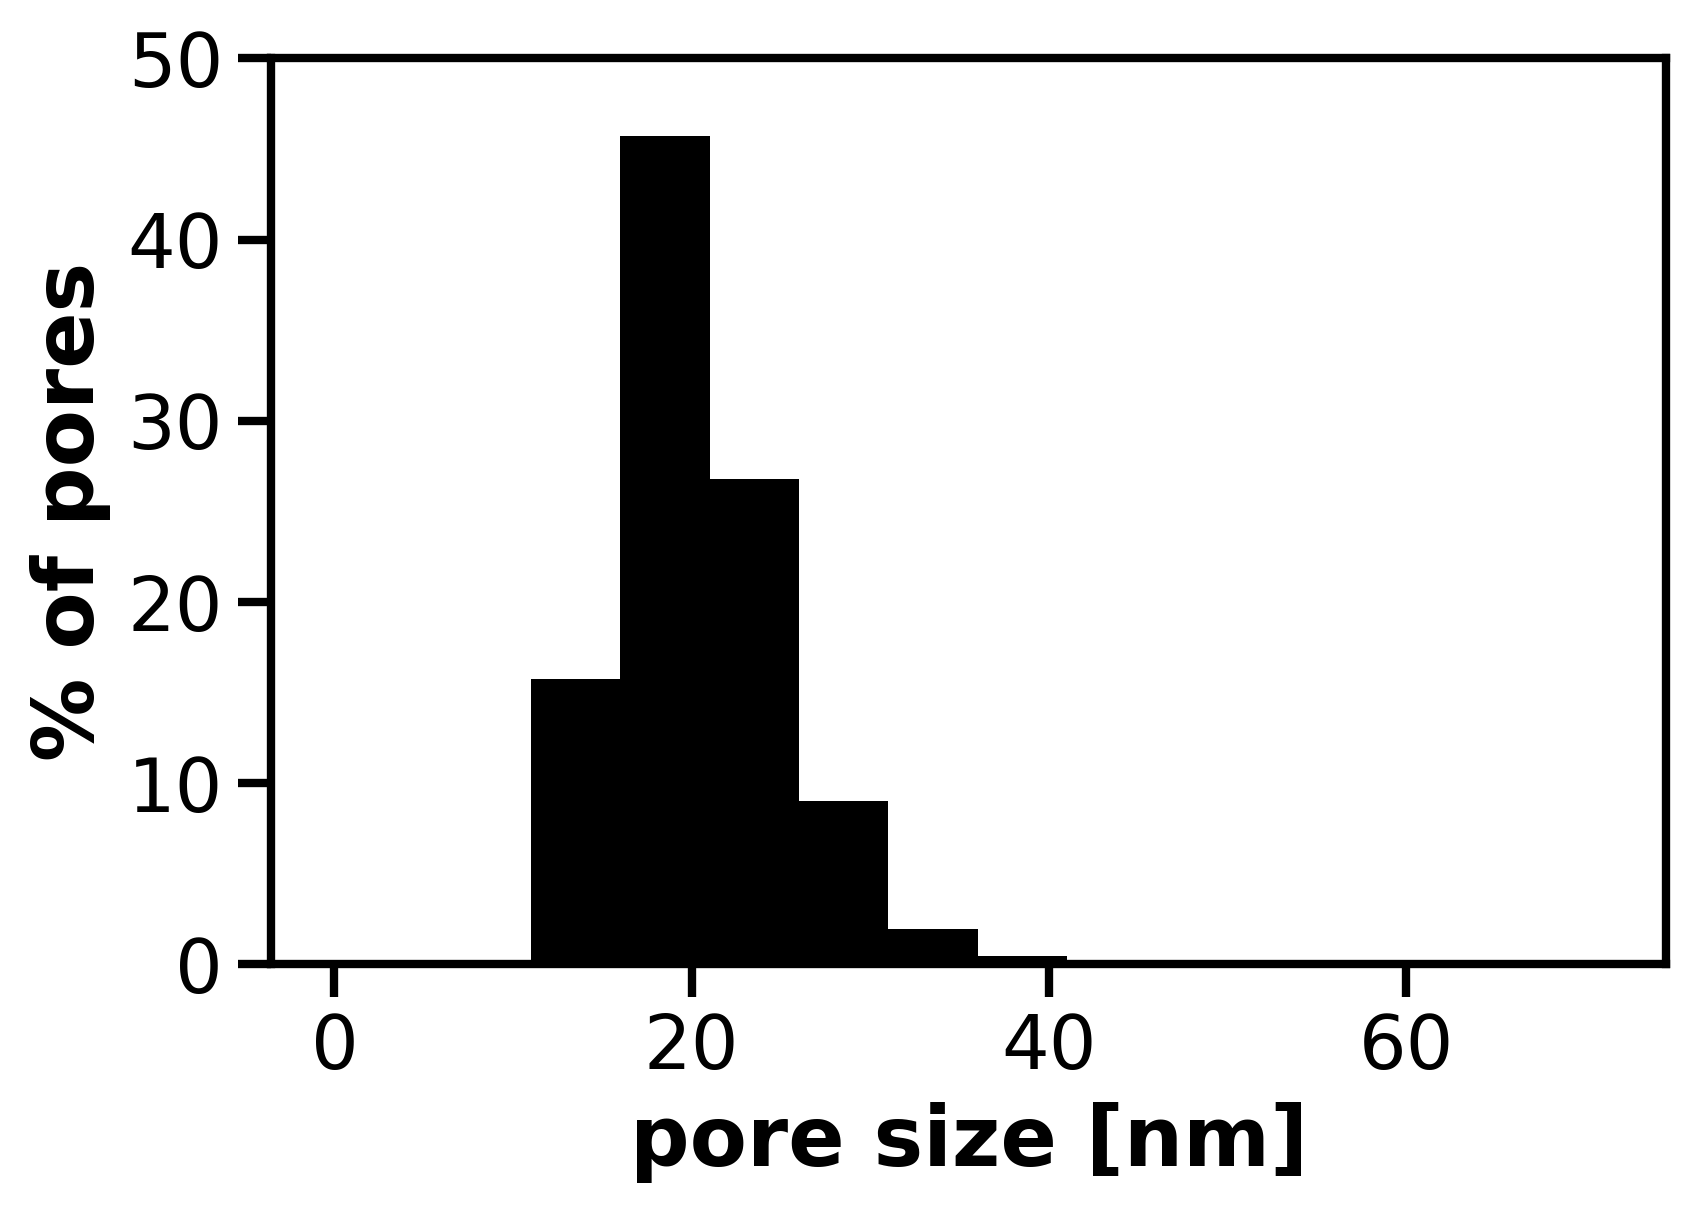

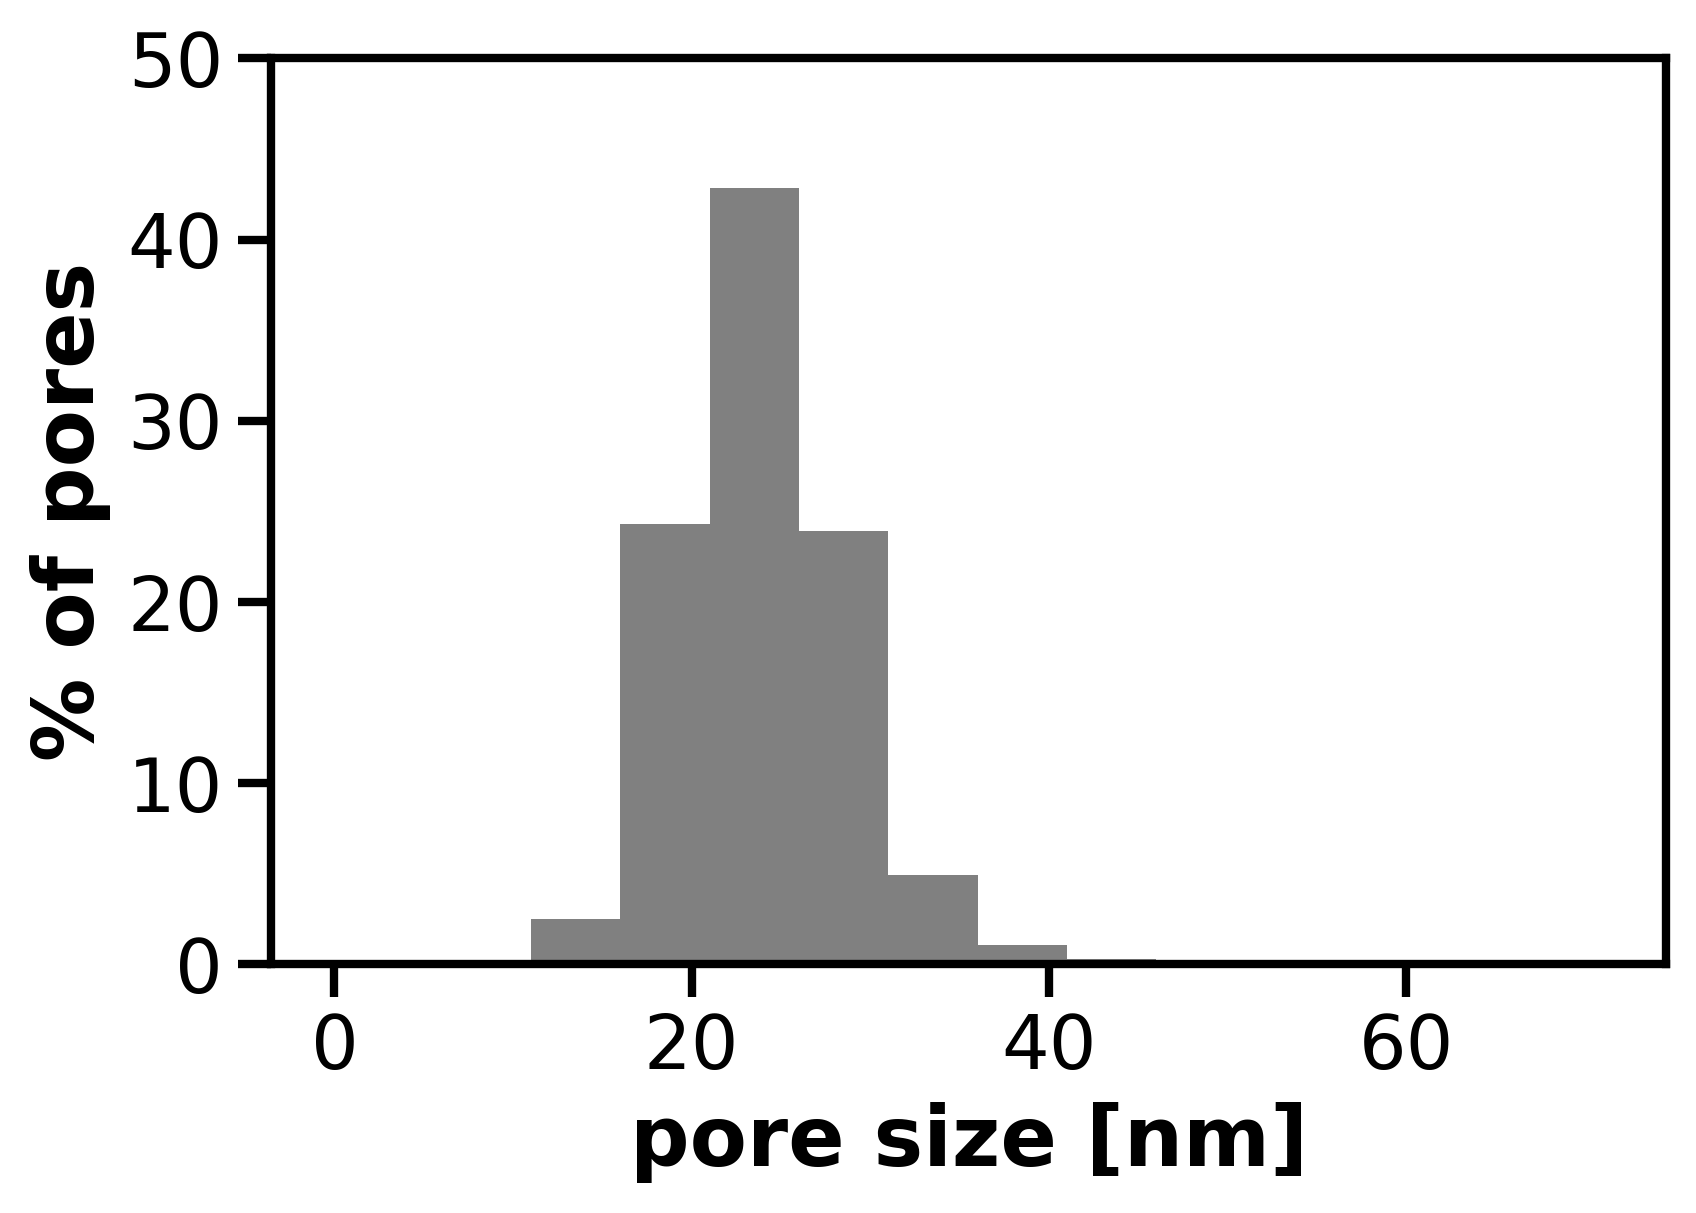

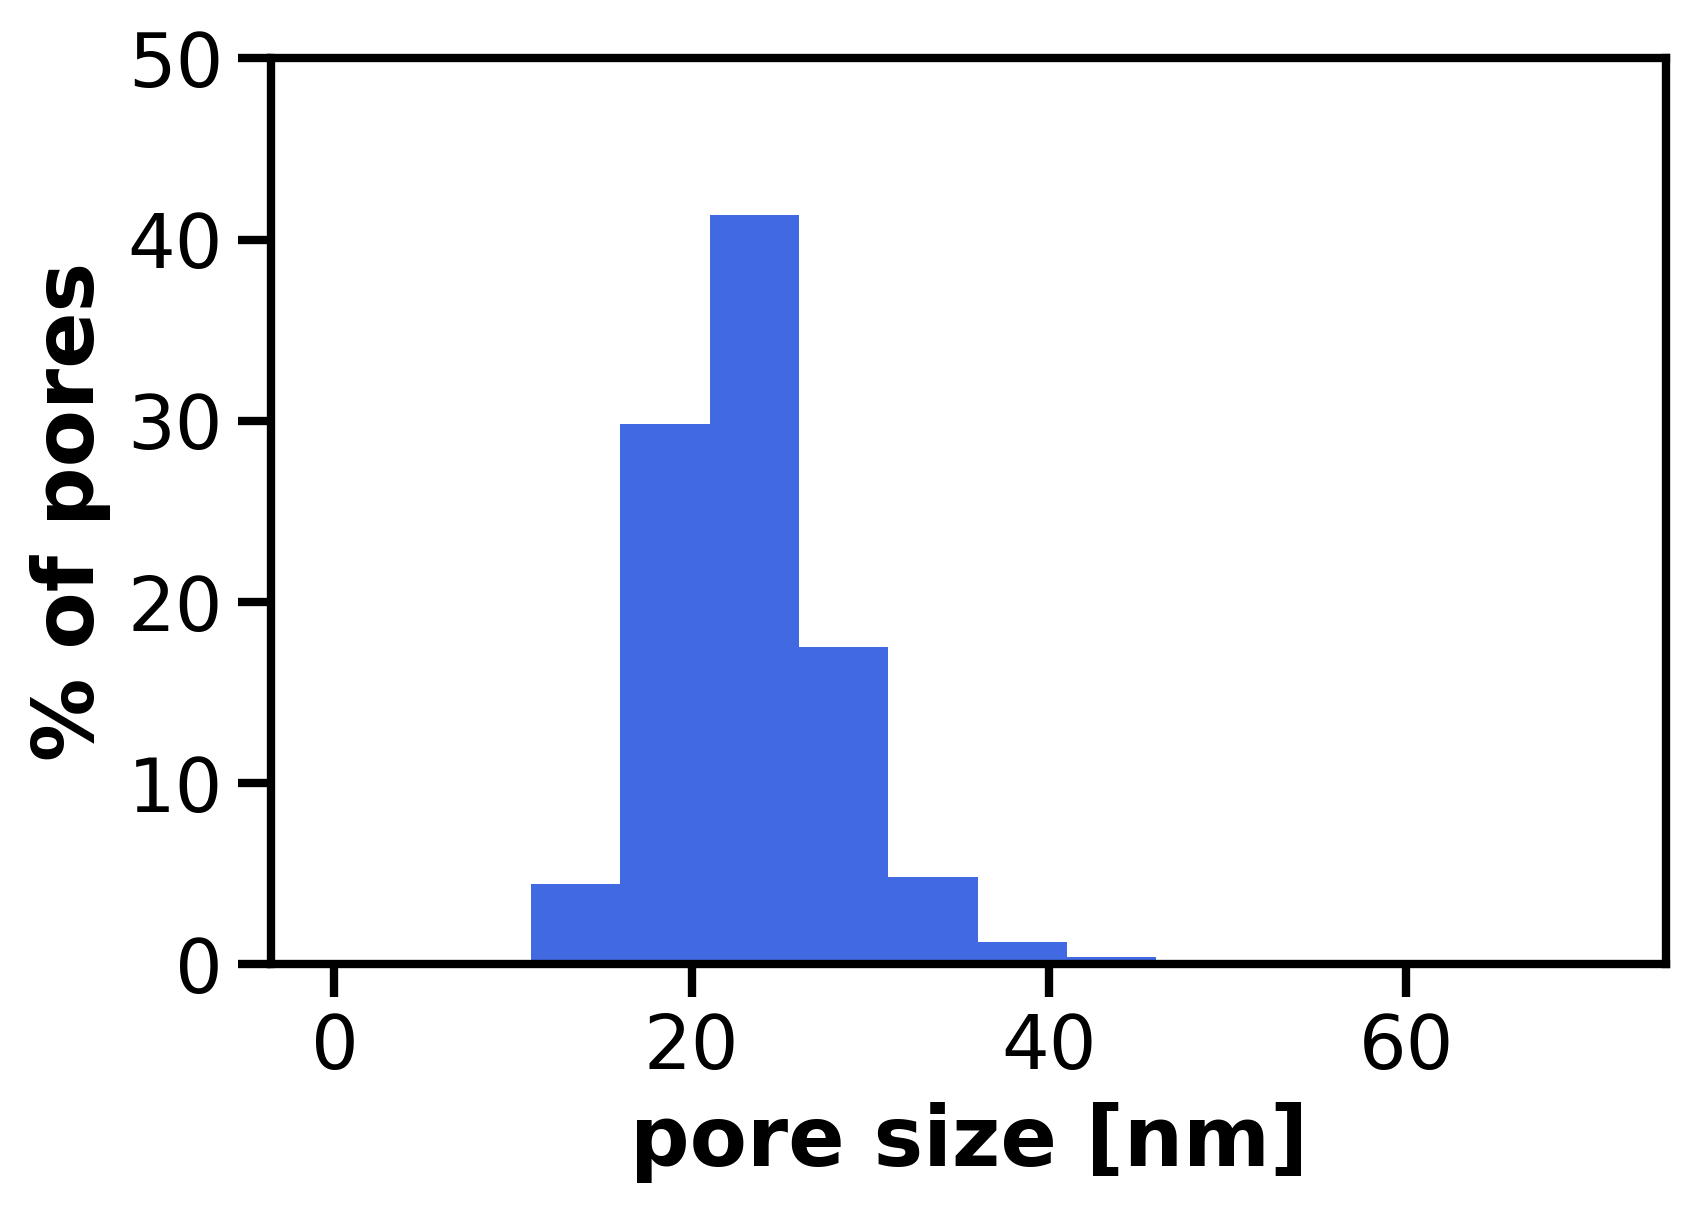

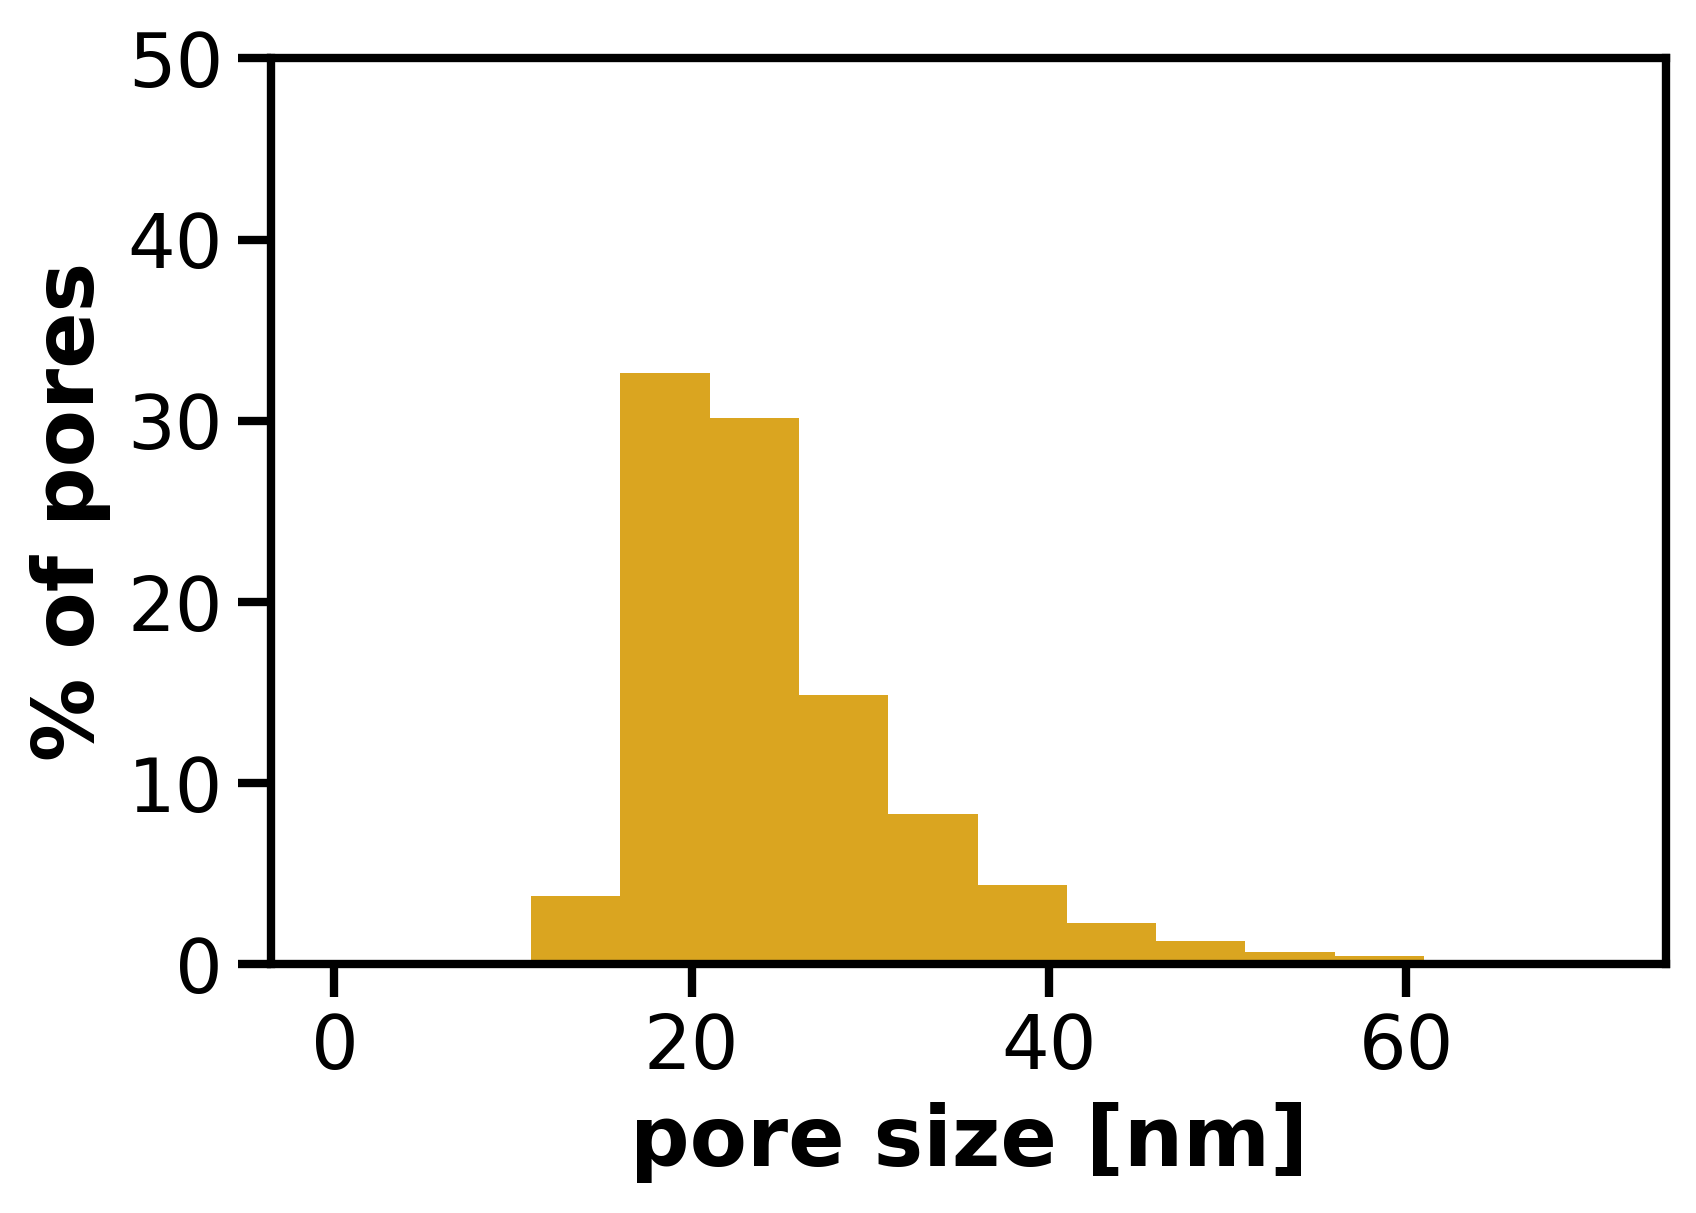

In [11]:
plt.figure(1, dpi=300).tight_layout()
ax = plt.gca()
ax = Deff_vals_NT_cortex["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_NT_cortex.index) / len(Deff_vals_NT_cortex.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71],color='black')
#ax.xaxis.set_ticks(np.arange(0, 71, 5))
ax.yaxis.set_ticks(np.arange(0, 51, 10))
ax.set_ylabel('% of pores', fontsize=20, weight='bold')
ax.set_xlabel('pore size [nm]', fontsize=20, weight='bold')
#ax.set_title('NC')
ax.tick_params(labelsize=18, length=8, width=2)
#ax.tick_params(which = 'minor', length=5, width=1)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

    
plt.figure(2, dpi=300).tight_layout()
ax2 = plt.gca()    
ax2 = Deff_vals_OGD_0_5h_cortex["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_OGD_0_5h_cortex.index) / len(Deff_vals_OGD_0_5h_cortex.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71], color='grey')
#ax2.xaxis.set_ticks(np.arange(0, 71, 5))
ax2.yaxis.set_ticks(np.arange(0, 51, 10))
ax2.set_ylabel('% of pores', fontsize=20, weight='bold')
ax2.set_xlabel('pore size [nm]', fontsize=20, weight='bold')
#ax2.set_title('OGD 0.5h')
ax2.tick_params(labelsize=18, length=8, width=2)
#ax2.tick_params(which = 'minor', length=5, width=1)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)


plt.figure(3, dpi=300).tight_layout()
ax3 = plt.gca()  
ax3 = Deff_vals_OGD_1_5h_cortex["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_OGD_1_5h_cortex.index) / len(Deff_vals_OGD_1_5h_cortex.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71], color='royalblue')
#ax3.xaxis.set_ticks(np.arange(0, 71, 5))
ax3.yaxis.set_ticks(np.arange(0, 51, 10))
ax3.set_ylabel('% of pores', fontsize=20, weight='bold')
ax3.set_xlabel('pore size [nm]', fontsize=20, weight='bold')
#ax3.set_title('OGD 1.5h')
ax3.tick_params(labelsize=18, length=8, width=2)
#ax3.tick_params(which = 'minor', length=5, width=1)
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(2)


plt.figure(4, dpi=300).tight_layout()
ax4 = plt.gca()
ax4 = Deff_vals_OGD_3h_cortex["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_OGD_3h_cortex.index) / len(Deff_vals_OGD_3h_cortex.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71], color='goldenrod')
#ax4.xaxis.set_ticks(np.arange(0, 71, 5))
ax4.yaxis.set_ticks(np.arange(0, 51, 10))
ax4.set_ylabel('% of pores', fontsize=20, weight='bold')
ax4.set_xlabel('pore size [nm]', fontsize=20, weight='bold')
#ax4.set_title('OGD 0.5h')
ax4.tick_params(labelsize=18, length=8, width=2)
#ax4.tick_params(which = 'minor', length=5, width=1)
for axis in ['top','bottom','left','right']:
    ax4.spines[axis].set_linewidth(2)

In [12]:
print(min(Deff_vals_NT_cortex["Pore size [nm]"]),',', max(Deff_vals_NT_cortex["Pore size [nm]"]),',',Deff_vals_NT_cortex["Pore size [nm]"].mean(),',',Deff_vals_NT_cortex["Pore size [nm]"].median())
print(min(Deff_vals_OGD_0_5h_cortex["Pore size [nm]"]),',', max(Deff_vals_OGD_0_5h_cortex["Pore size [nm]"]),',',Deff_vals_OGD_0_5h_cortex["Pore size [nm]"].mean(),',',Deff_vals_OGD_0_5h_cortex["Pore size [nm]"].median())
print(min(Deff_vals_OGD_1_5h_cortex["Pore size [nm]"]),',', max(Deff_vals_OGD_1_5h_cortex["Pore size [nm]"]),',',Deff_vals_OGD_1_5h_cortex["Pore size [nm]"].mean(),',',Deff_vals_OGD_1_5h_cortex["Pore size [nm]"].median())
print(min(Deff_vals_OGD_3h_cortex["Pore size [nm]"]),',', max(Deff_vals_OGD_3h_cortex["Pore size [nm]"]),',',Deff_vals_OGD_3h_cortex["Pore size [nm]"].mean(),',',Deff_vals_OGD_3h_cortex["Pore size [nm]"].median())

11.42987886450029 , 190.17808288094236 , 20.45916231495065 , 19.468275616136026
12.245778136318199 , 77.81142027665165 , 23.937241557726935 , 23.680019543638732
12.550839821395384 , 212.20897489065072 , 23.283962977882794 , 22.766093004097634
11.690949609892929 , 1023.7150178014783 , 25.694005512547132 , 22.93050782610289


In [13]:
pro_30 = 0
pro_40 = 0
pro_50 = 0
pro_60 = 0
pro_75 = 0
pro_80 = 0
pro_90 = 0
pro_100 = 0
total = len(Deff_vals_NT_cortex)

for traj in range(0,total):
    if Deff_vals_NT_cortex['Pore size [nm]'][traj] >= 30:
        pro_30 += 1
        if Deff_vals_NT_cortex['Pore size [nm]'][traj] >= 40:
            pro_40 += 1
            if Deff_vals_NT_cortex['Pore size [nm]'][traj] >= 50:
                pro_50 += 1
                if Deff_vals_NT_cortex['Pore size [nm]'][traj] >= 60:
                    pro_60 += 1
                    if Deff_vals_NT_cortex['Pore size [nm]'][traj] >= 75:
                        pro_75 += 1
                        if Deff_vals_NT_cortex['Pore size [nm]'][traj] >= 80:
                            pro_80 += 1
                            if Deff_vals_NT_cortex['Pore size [nm]'][traj] >= 90:
                                pro_90 += 1
                                if Deff_vals_NT_cortex['Pore size [nm]'][traj] >= 100:
                                    pro_100 += 1

                
percent_30 = pro_30/total*100
percent_40 = pro_40/total*100
percent_50 = pro_50/total*100

In [14]:
print(percent_30, pro_30)
print(percent_40, pro_40)
print(percent_50)
print(pro_50)
print(pro_75)
print(pro_100)

3.5189894184234274 858
0.34451644655893693 84
0.07792633910261668
19
2
1


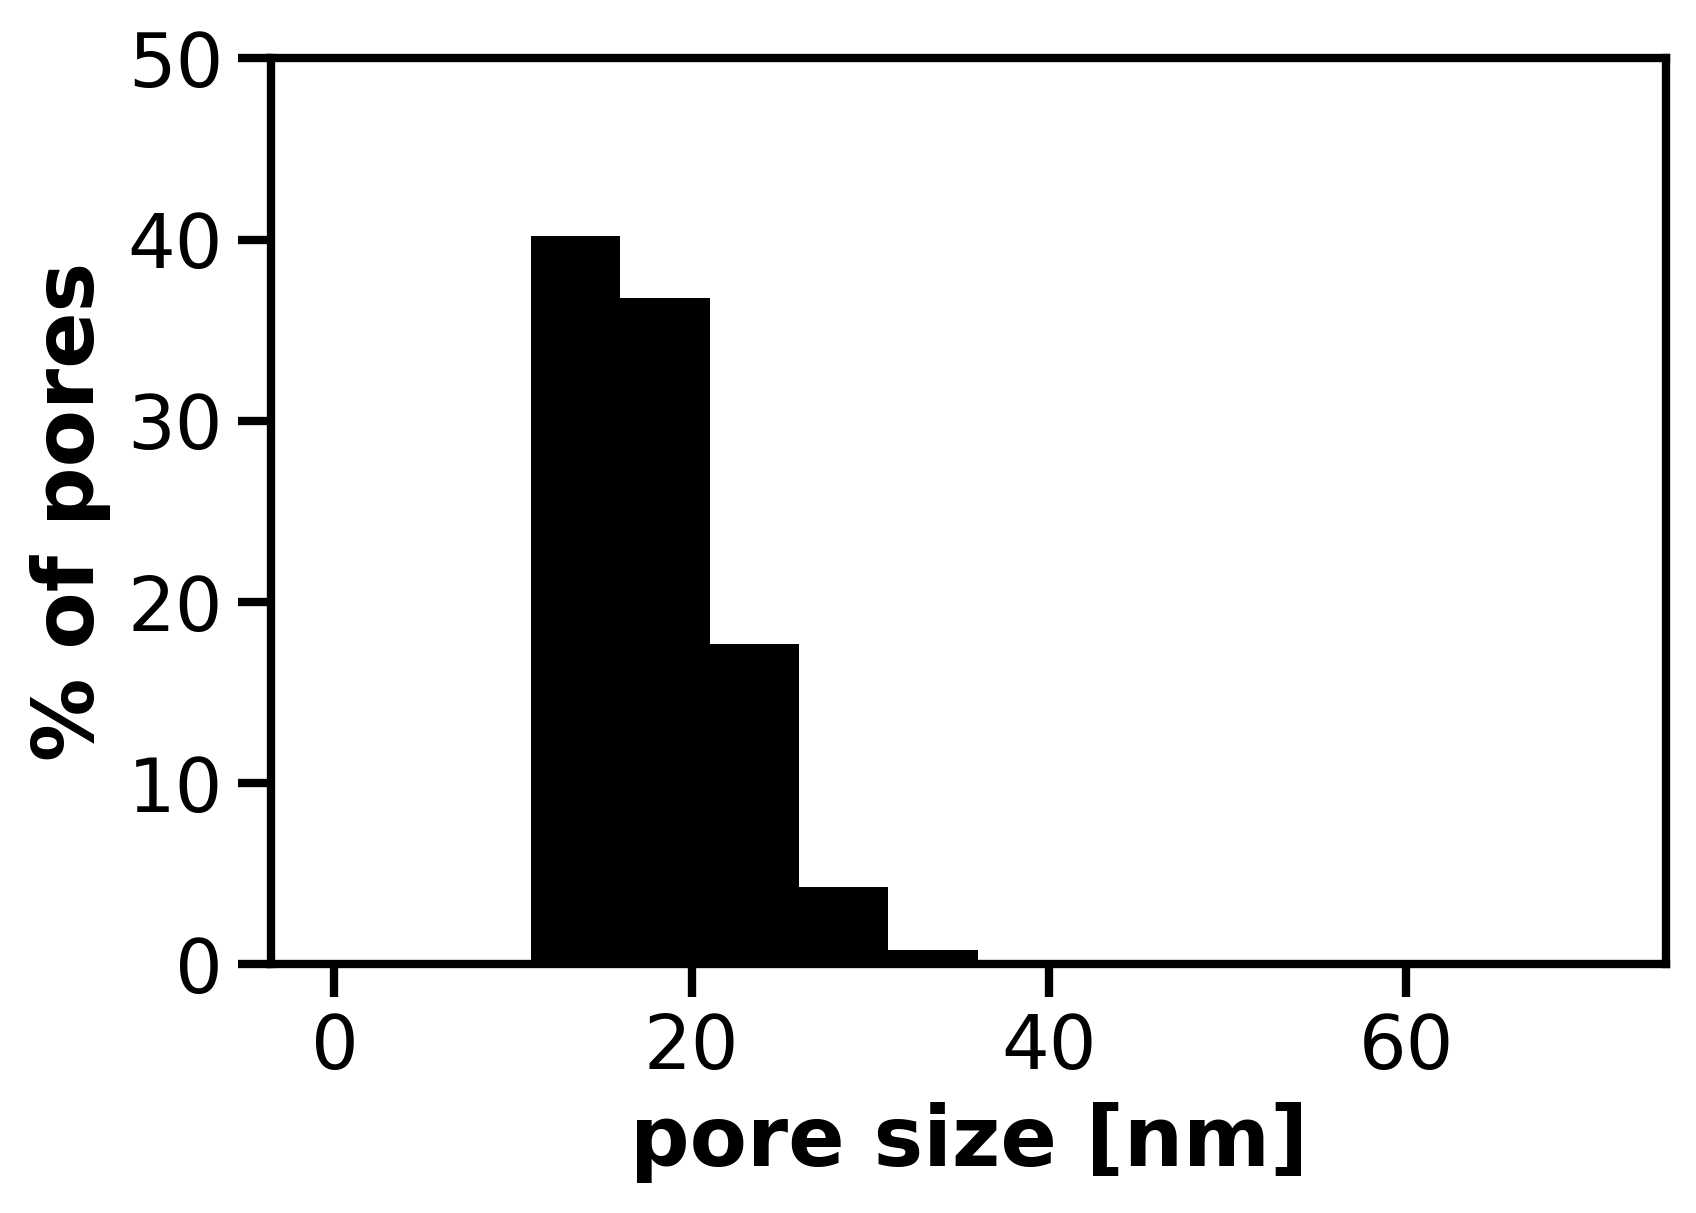

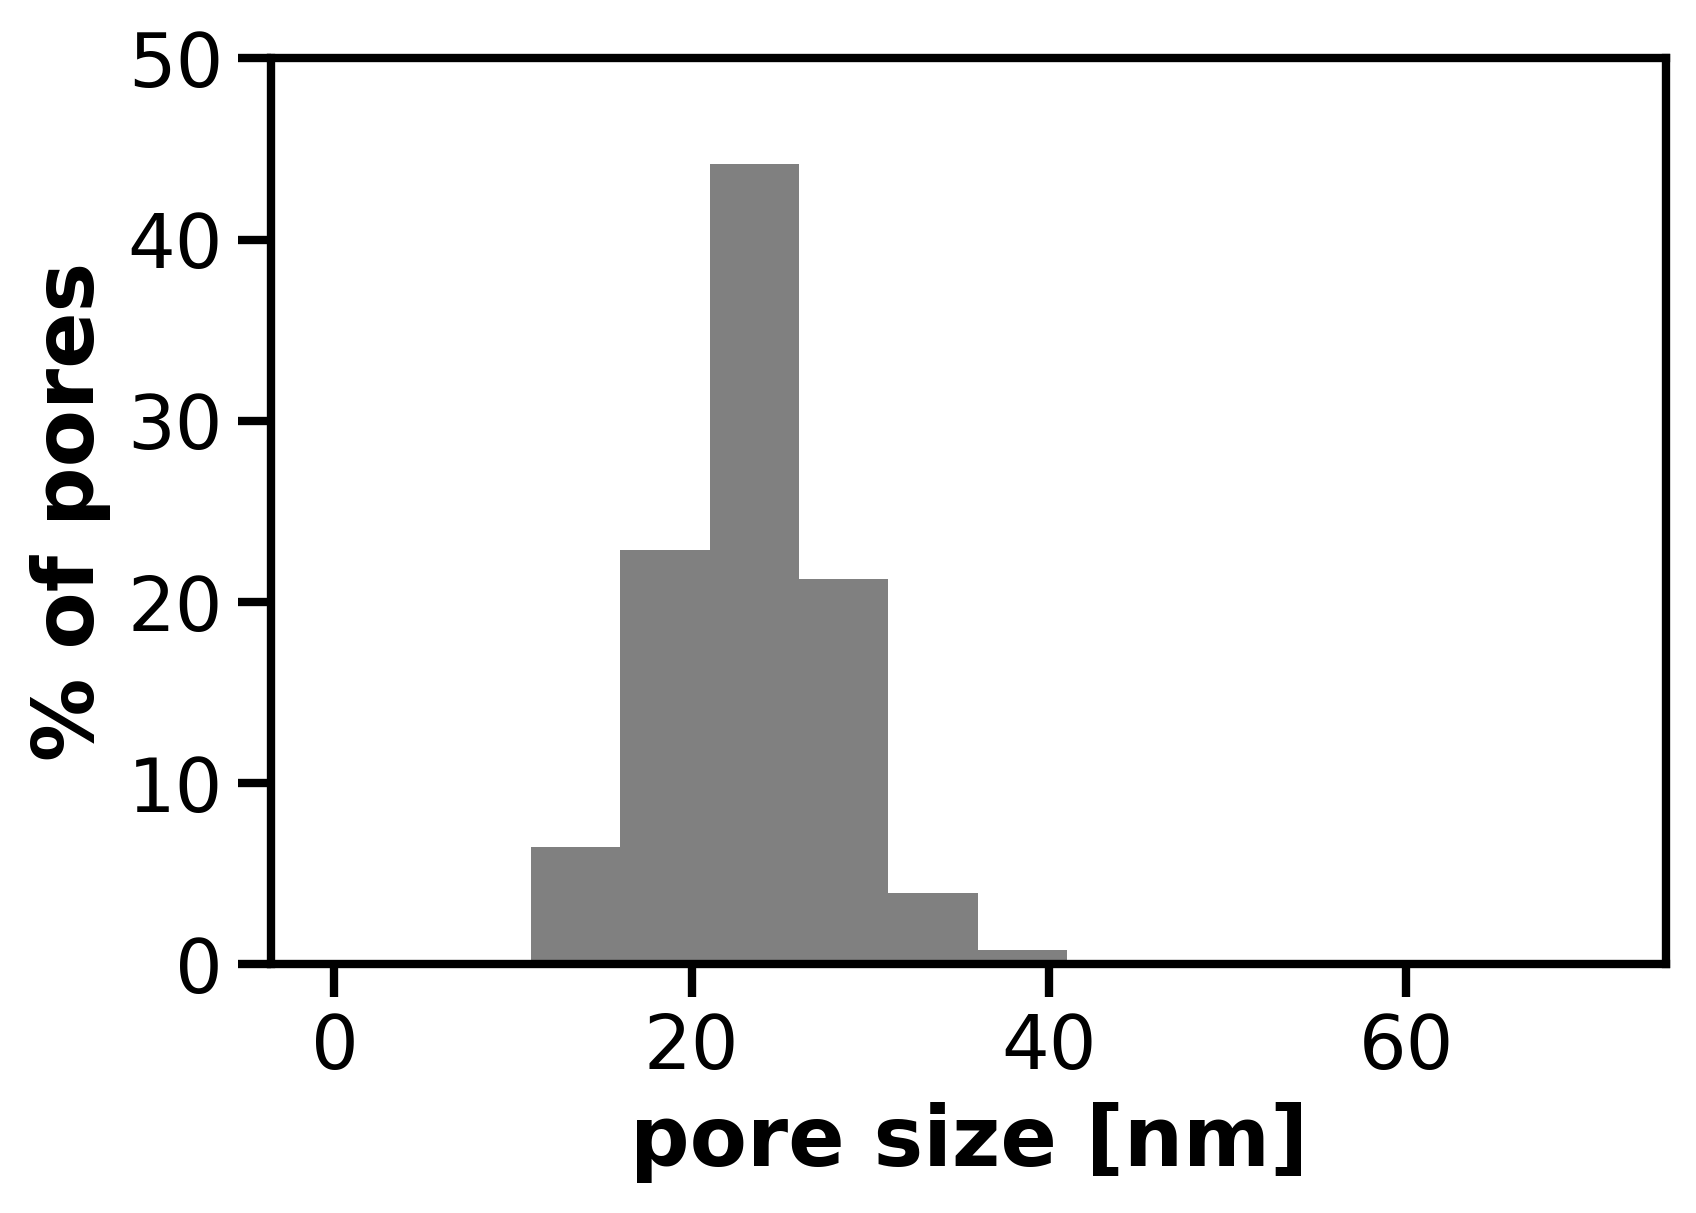

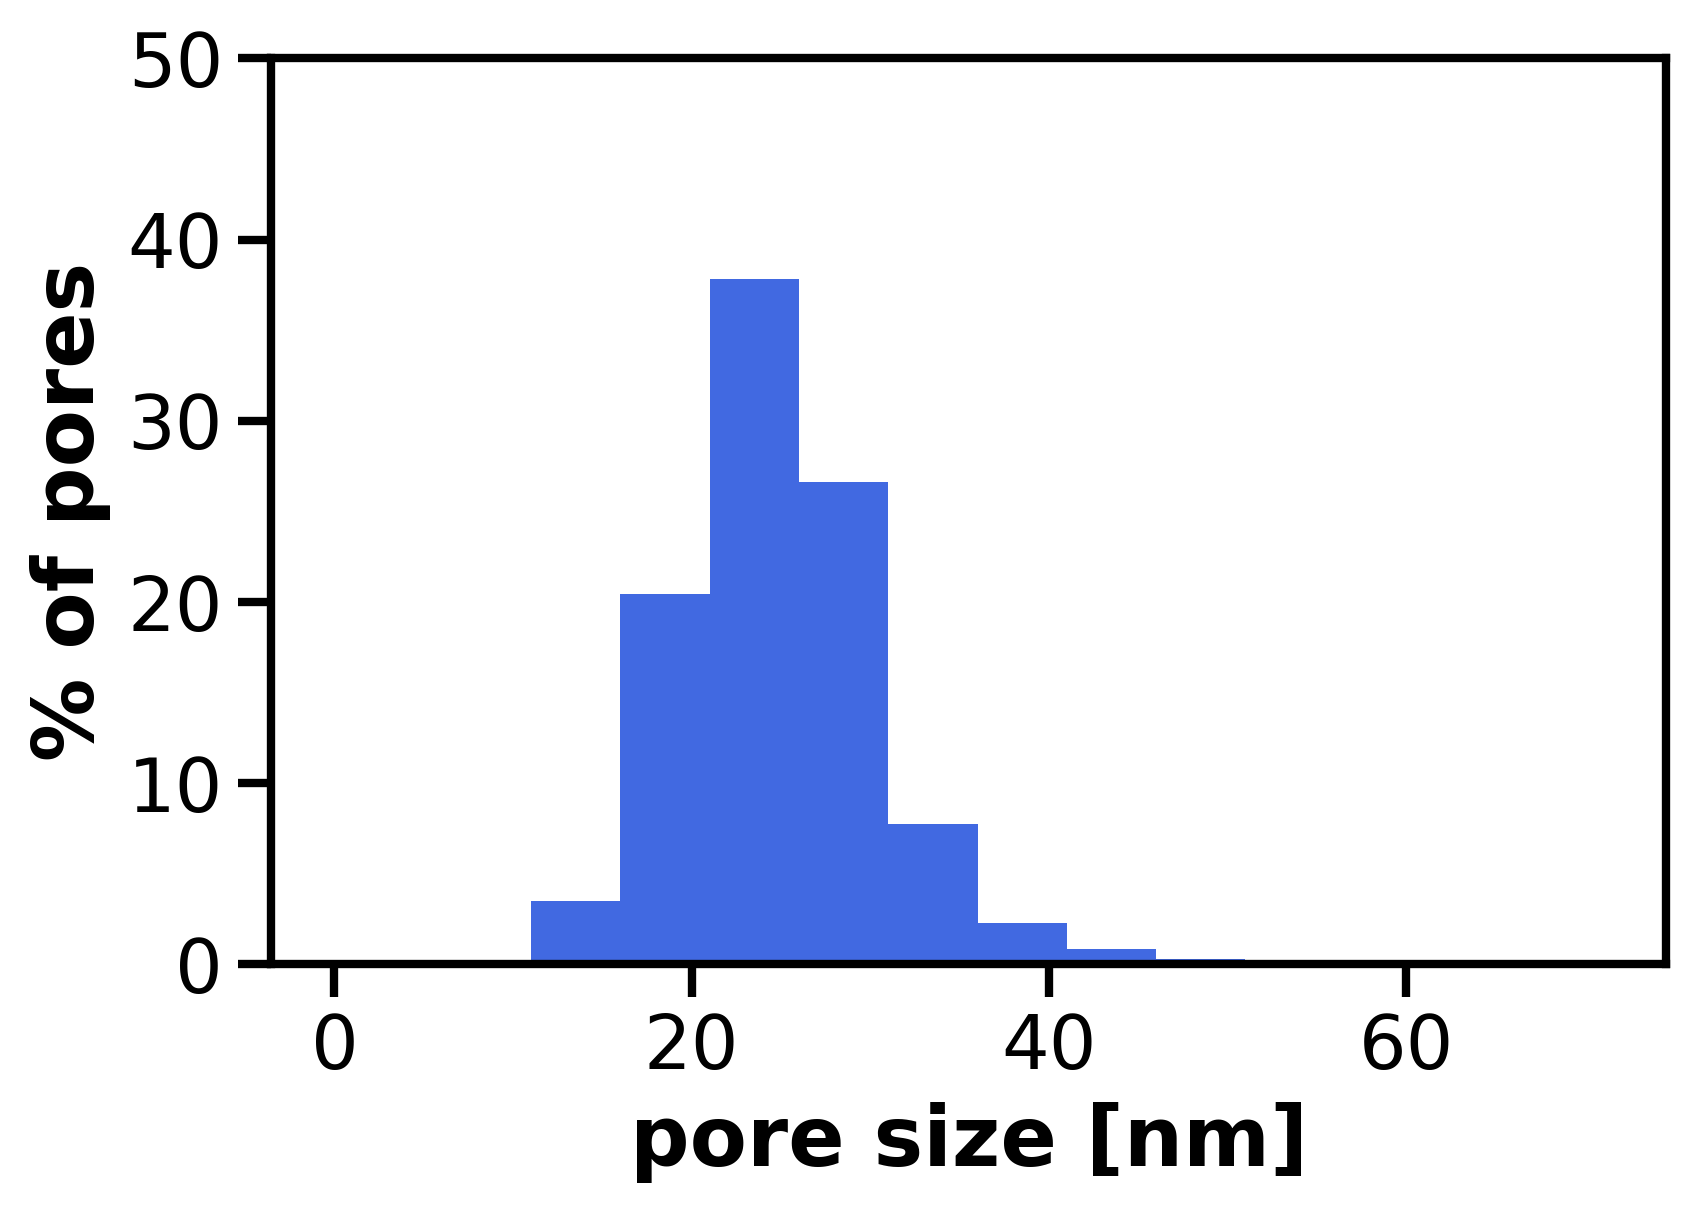

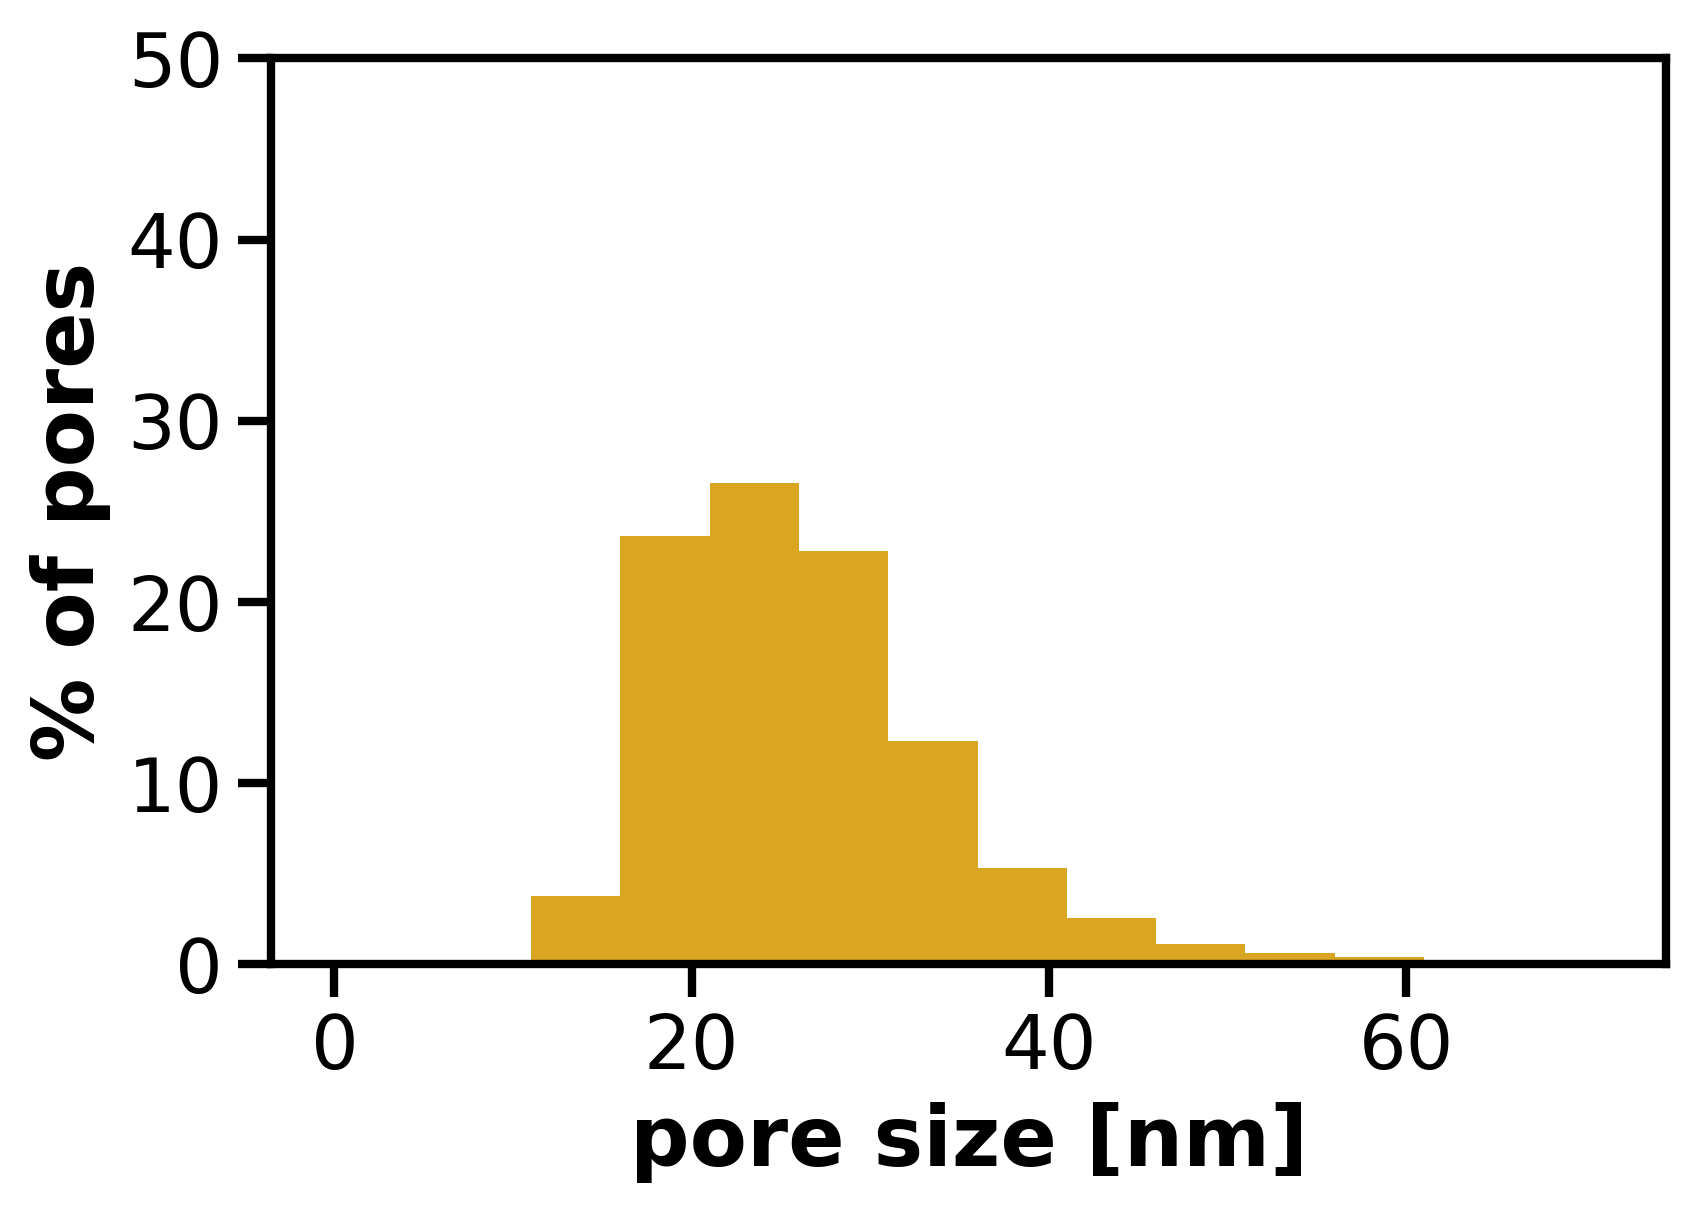

In [15]:
plt.figure(1, dpi=300).tight_layout()
ax = plt.gca()
ax = Deff_vals_NT_striatum["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_NT_striatum.index) / len(Deff_vals_NT_striatum.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71],color='black')
#ax.xaxis.set_ticks(np.arange(0, 101, 5))
ax.yaxis.set_ticks(np.arange(0, 51, 10))
ax.set_ylabel('% of pores', fontsize=20, weight='bold')
ax.set_xlabel('pore size [nm]', fontsize=20, weight='bold')
#ax.set_title('NC')
ax.tick_params(labelsize=18, length=8, width=2)
#ax.tick_params(which = 'minor', length=5, width=1)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

    
plt.figure(2, dpi=300).tight_layout()
ax2 = plt.gca()    
ax2 = Deff_vals_OGD_0_5h_striatum["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_OGD_0_5h_striatum.index) / len(Deff_vals_OGD_0_5h_striatum.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71], color='grey')
#ax2.xaxis.set_ticks(np.arange(0, 101, 5))
ax2.yaxis.set_ticks(np.arange(0, 51, 10))
ax2.set_ylabel('% of pores', fontsize=20, weight='bold')
ax2.set_xlabel('pore size [nm]', fontsize=20, weight='bold')
#ax2.set_title('OGD 0.5h')
ax2.tick_params(labelsize=18, length=8, width=2)
#ax2.tick_params(which = 'minor', length=5, width=1)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)


plt.figure(3, dpi=300).tight_layout()
ax3 = plt.gca()  
ax3 = Deff_vals_OGD_1_5h_striatum["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_OGD_1_5h_striatum.index) / len(Deff_vals_OGD_1_5h_striatum.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71], color='royalblue')
#ax3.xaxis.set_ticks(np.arange(0, 101, 5))
ax3.yaxis.set_ticks(np.arange(0, 51, 10))
ax3.set_ylabel('% of pores', fontsize=20, weight='bold')
ax3.set_xlabel('pore size [nm]', fontsize=20, weight='bold')
#ax3.set_title('OGD 1.5h')
ax3.tick_params(labelsize=18, length=8, width=2)
#ax3.tick_params(which = 'minor', length=5, width=1)
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(2)


plt.figure(4, dpi=300).tight_layout()
ax4 = plt.gca()
ax4 = Deff_vals_OGD_3h_striatum["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_OGD_3h_striatum.index) / len(Deff_vals_OGD_3h_striatum.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71], color='goldenrod')
#ax4.xaxis.set_ticks(np.arange(0, 101, 5))
ax4.yaxis.set_ticks(np.arange(0, 51, 10))
ax4.set_ylabel('% of pores', fontsize=20, weight='bold')
ax4.set_xlabel('pore size [nm]', fontsize=20, weight='bold')
#ax4.set_title('OGD 0.5h')
ax4.tick_params(labelsize=18, length=8, width=2)
#ax4.tick_params(which = 'minor', length=5, width=1)
for axis in ['top','bottom','left','right']:
    ax4.spines[axis].set_linewidth(2)

In [16]:
print(min(Deff_vals_NT_striatum["Pore size [nm]"]),',', max(Deff_vals_NT_striatum["Pore size [nm]"]),',',Deff_vals_NT_striatum["Pore size [nm]"].mean(),',',Deff_vals_NT_striatum["Pore size [nm]"].median())
print(min(Deff_vals_OGD_0_5h_striatum["Pore size [nm]"]),',', max(Deff_vals_OGD_0_5h_striatum["Pore size [nm]"]),',',Deff_vals_OGD_0_5h_striatum["Pore size [nm]"].mean(),',',Deff_vals_OGD_0_5h_striatum["Pore size [nm]"].median())
print(min(Deff_vals_OGD_1_5h_striatum["Pore size [nm]"]),',', max(Deff_vals_OGD_1_5h_striatum["Pore size [nm]"]),',',Deff_vals_OGD_1_5h_striatum["Pore size [nm]"].mean(),',',Deff_vals_OGD_1_5h_striatum["Pore size [nm]"].median())
print(min(Deff_vals_OGD_3h_striatum["Pore size [nm]"]),',', max(Deff_vals_OGD_3h_striatum["Pore size [nm]"]),',',Deff_vals_OGD_3h_striatum["Pore size [nm]"].mean(),',',Deff_vals_OGD_3h_striatum["Pore size [nm]"].median())

11.63439848469006 , 91.41571154367648 , 18.255142406321188 , 16.939244907434606
11.542190983850595 , 146.45385325050918 , 23.400206981285983 , 23.506853424981024
12.108448227613072 , 230.73465980783544 , 24.97595457951101 , 24.592190375275184
11.360067218508481 , 2715.1384458341327 , 26.850490090974326 , 25.29143515948919


In [45]:
pro_30 = 0
pro_40 = 0
pro_50 = 0
pro_60 = 0
pro_75 = 0
pro_80 = 0
pro_90 = 0
pro_100 = 0
total = len(Deff_vals_OGD_3h_striatum)

for traj in range(0,total):
    if Deff_vals_OGD_3h_striatum['Pore size [nm]'][traj] >= 30:
        pro_30 += 1
        if Deff_vals_OGD_3h_striatum['Pore size [nm]'][traj] >= 40:
            pro_40 += 1
            if Deff_vals_OGD_3h_striatum['Pore size [nm]'][traj] >= 50:
                pro_50 += 1
                if Deff_vals_OGD_3h_striatum['Pore size [nm]'][traj] >= 60:
                    pro_60 += 1
                    if Deff_vals_OGD_3h_striatum['Pore size [nm]'][traj] >= 75:
                        pro_75 += 1
                        if Deff_vals_OGD_3h_striatum['Pore size [nm]'][traj] >= 80:
                            pro_80 += 1
                            if Deff_vals_OGD_3h_striatum['Pore size [nm]'][traj] >= 90:
                                pro_90 += 1
                                if Deff_vals_OGD_3h_striatum['Pore size [nm]'][traj] >= 100:
                                    pro_100 += 1

                
percent_30 = pro_30/total*100
percent_40 = pro_40/total*100
percent_50 = pro_50/total*100

In [46]:
print(percent_30, pro_30)
print(percent_40, pro_40)
print(percent_50)
print(pro_50)
print(pro_75)
print(pro_100)

26.903404654068407 13781
6.3056379821958455 3230
1.9971107293456192
1023
189
85


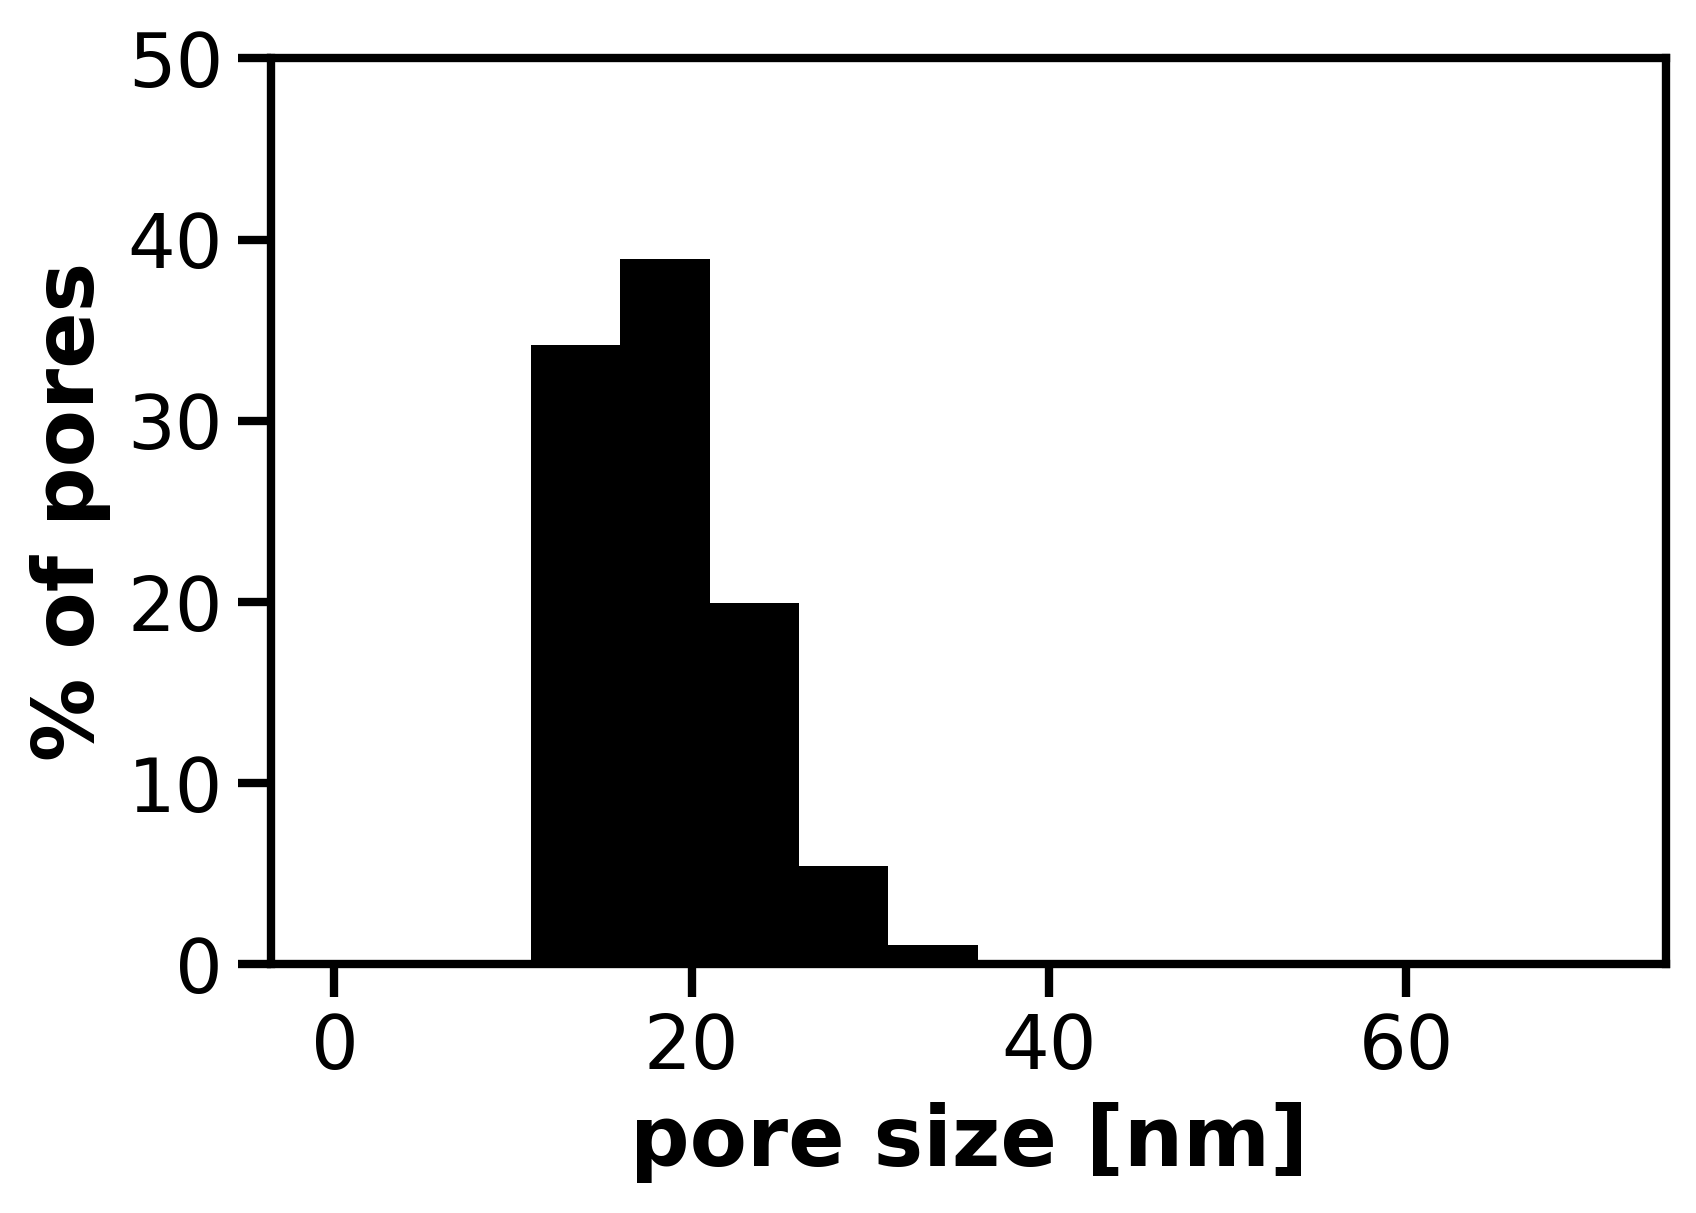

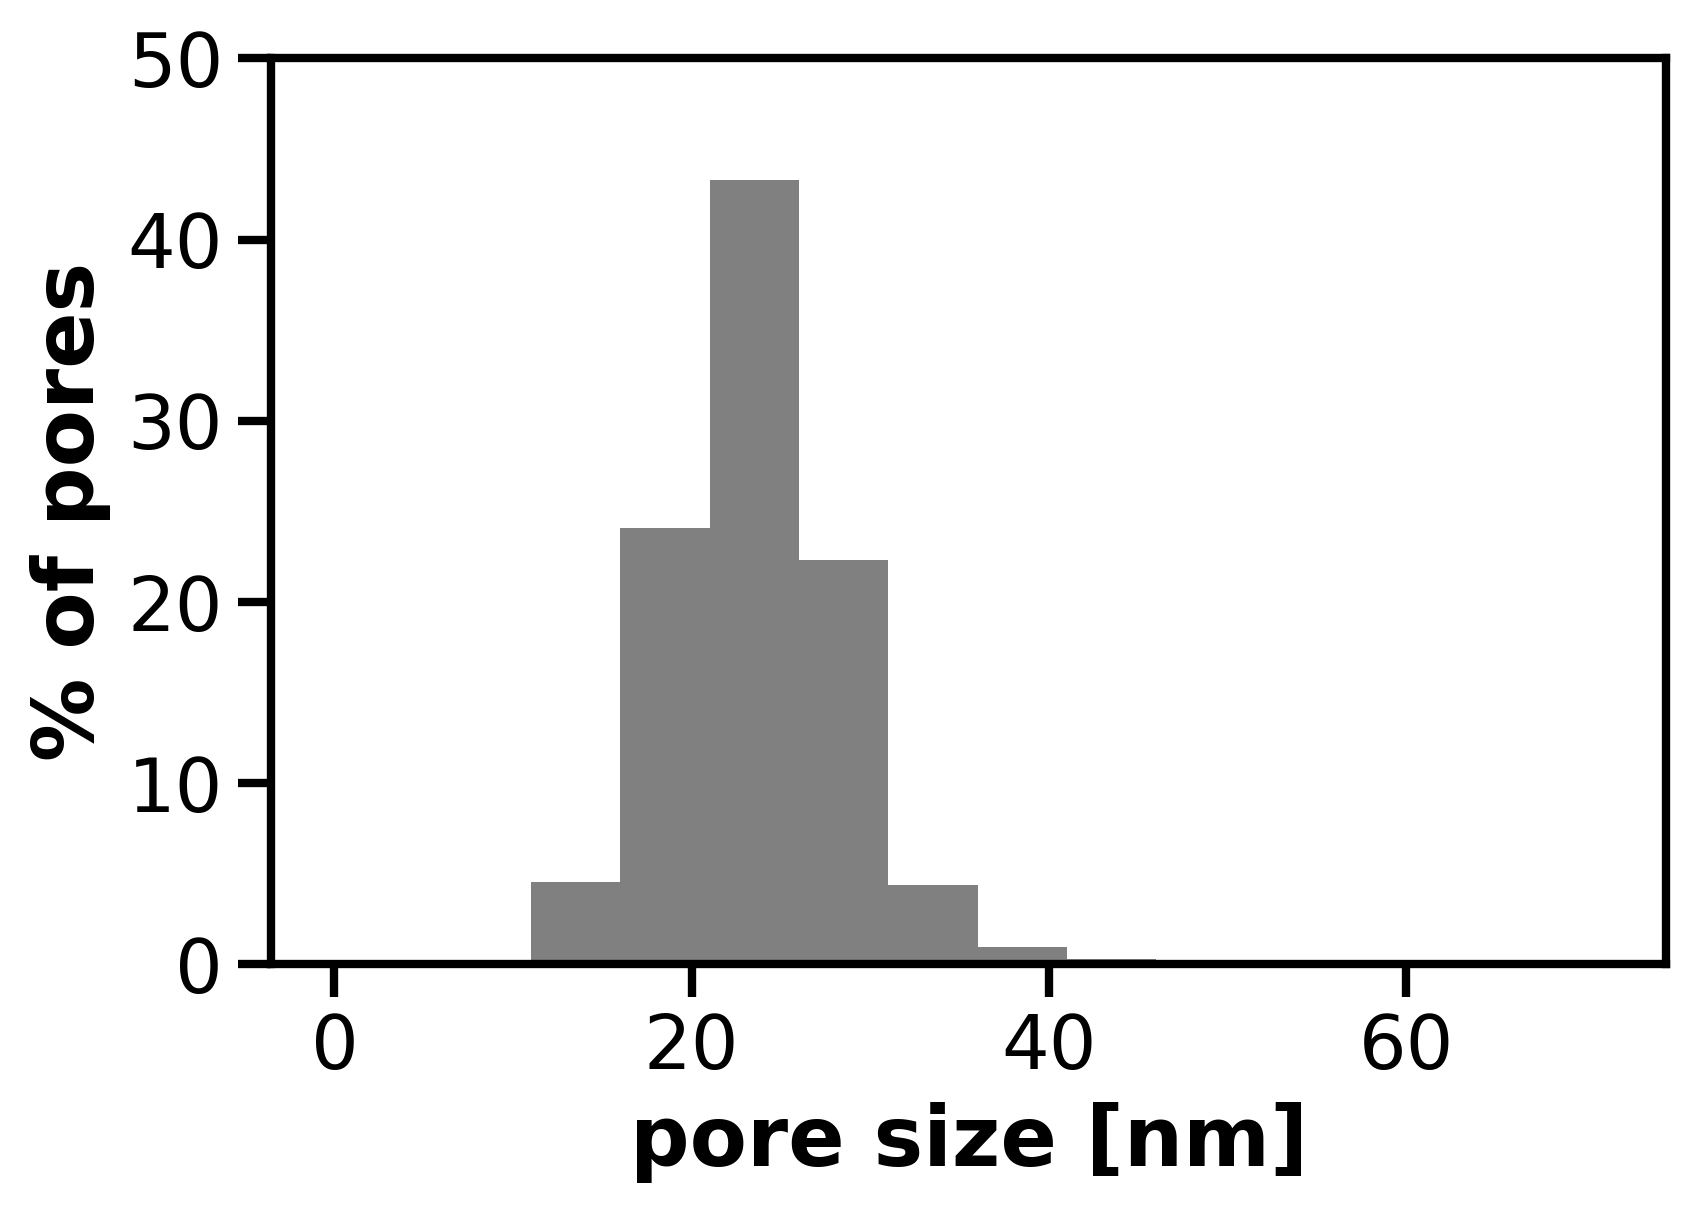

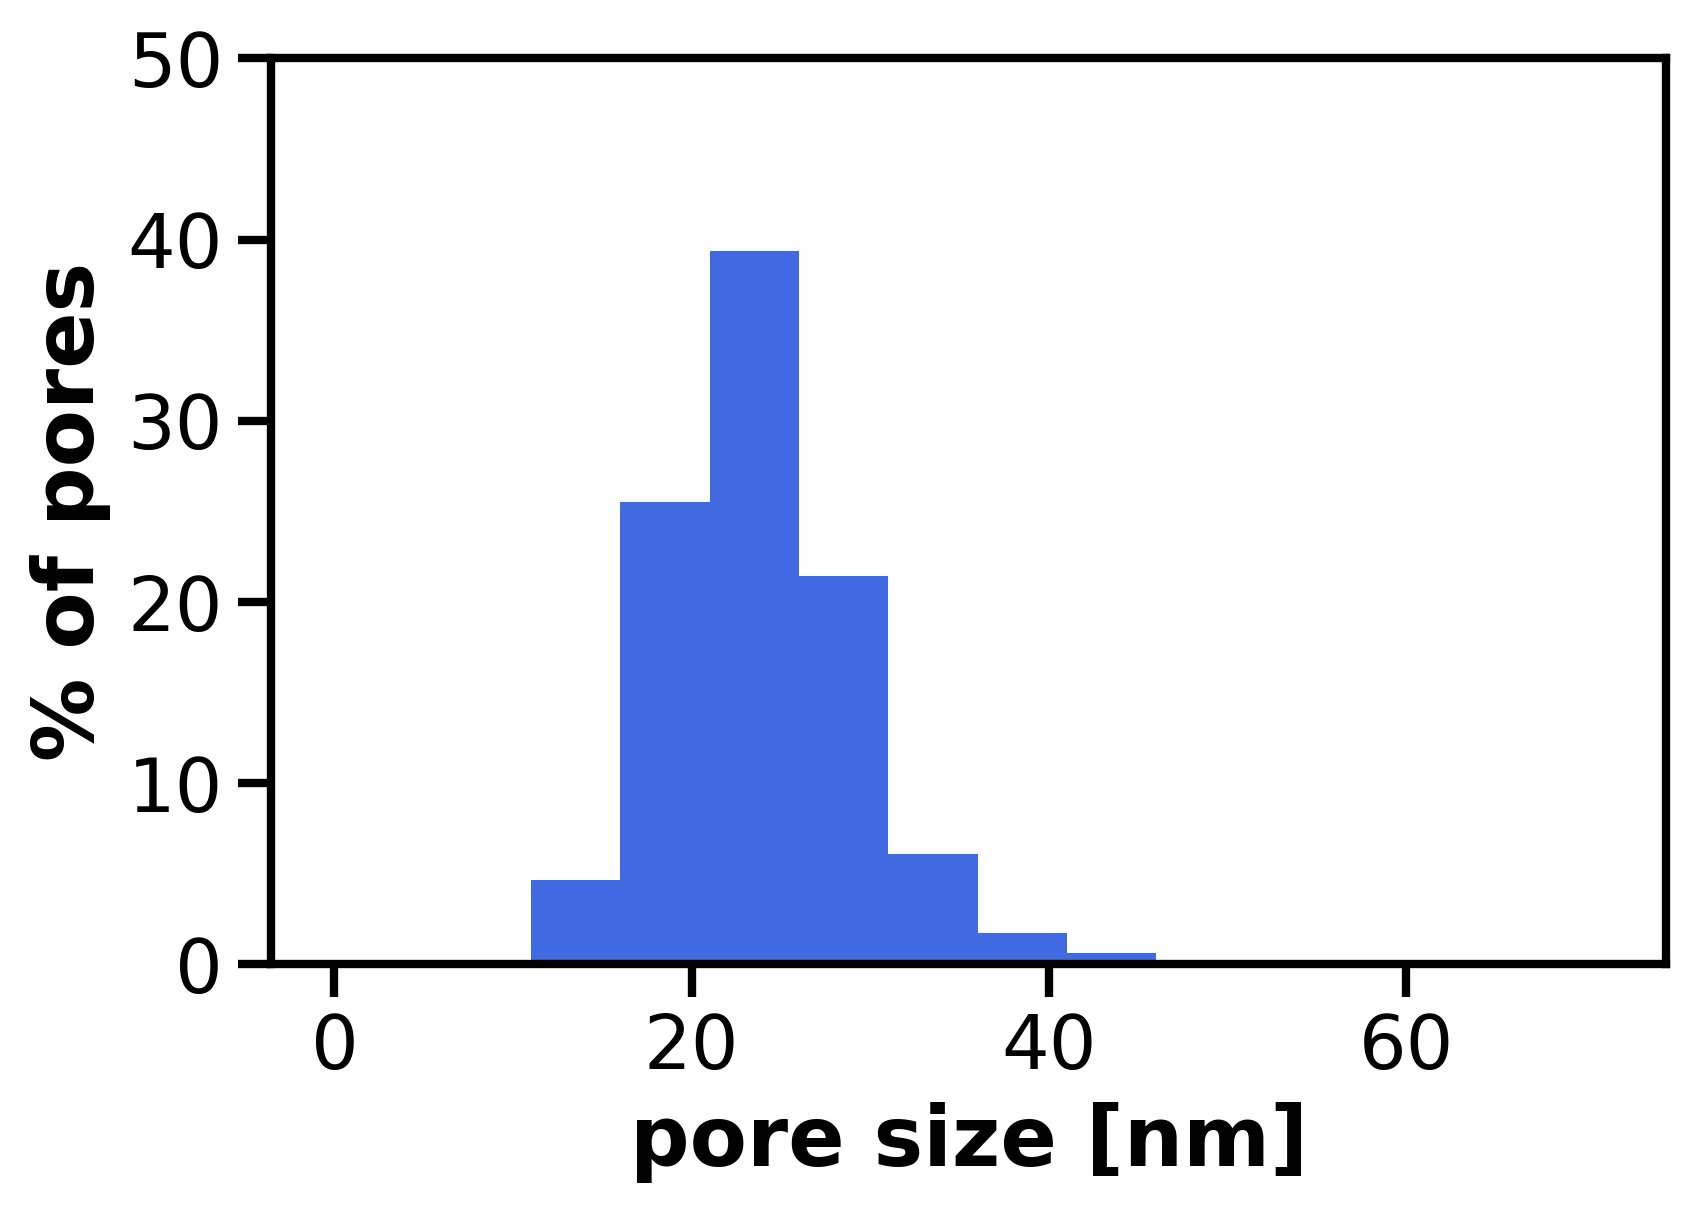

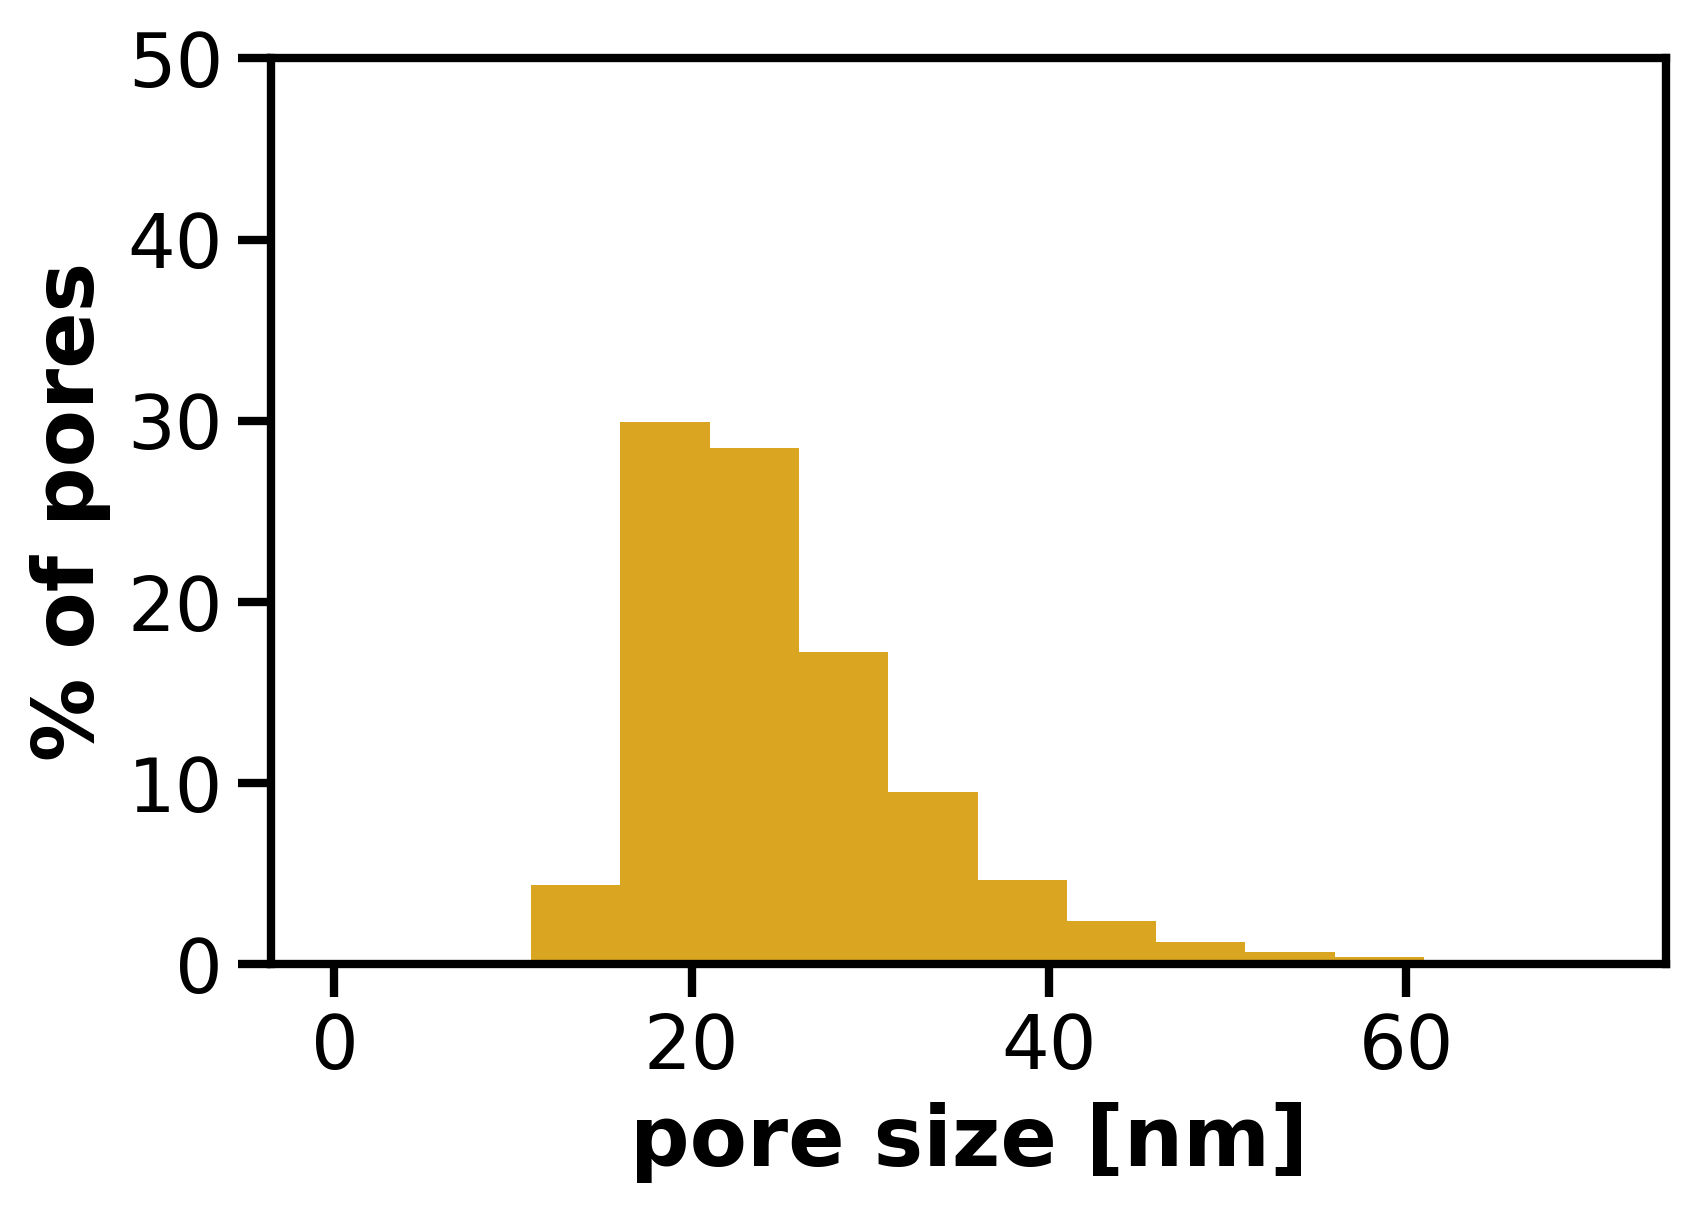

In [17]:
plt.figure(1, dpi=300).tight_layout()
ax = plt.gca()
ax = Deff_vals_NT["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_NT.index) / len(Deff_vals_NT.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71],color='black')
#ax.xaxis.set_ticks(np.arange(0, 101, 5))
ax.yaxis.set_ticks(np.arange(0, 51, 10))
ax.set_ylabel('% of pores', fontsize=20, weight='bold')
ax.set_xlabel('pore size [nm]', fontsize=20, weight='bold')
#ax.set_title('NC')
ax.tick_params(labelsize=18, length=8, width=2)
#ax.tick_params(which = 'minor', length=5, width=1)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

    
plt.figure(2, dpi=300).tight_layout()
ax2 = plt.gca()    
ax2 = Deff_vals_OGD_0_5h["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_OGD_0_5h.index) / len(Deff_vals_OGD_0_5h.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71], color='grey')
#ax2.xaxis.set_ticks(np.arange(0, 101, 5))
ax2.yaxis.set_ticks(np.arange(0, 51, 10))
ax2.set_ylabel('% of pores', fontsize=20, weight='bold')
ax2.set_xlabel('pore size [nm]', fontsize=20, weight='bold')
#ax2.set_title('OGD 0.5h')
ax2.tick_params(labelsize=18, length=8, width=2)
#ax2.tick_params(which = 'minor', length=5, width=1)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)


plt.figure(3, dpi=300).tight_layout()
ax3 = plt.gca()  
ax3 = Deff_vals_OGD_1_5h["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_OGD_1_5h.index) / len(Deff_vals_OGD_1_5h.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71], color='royalblue')
#ax3.xaxis.set_ticks(np.arange(0, 101, 5))
ax3.yaxis.set_ticks(np.arange(0, 51, 10))
ax3.set_ylabel('% of pores', fontsize=20, weight='bold')
ax3.set_xlabel('pore size [nm]', fontsize=20, weight='bold')
#ax3.set_title('OGD 1.5h')
ax3.tick_params(labelsize=18, length=8, width=2)
#ax3.tick_params(which = 'minor', length=5, width=1)
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(2)


plt.figure(4, dpi=300).tight_layout()
ax4 = plt.gca()
ax4 = Deff_vals_OGD_3h["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_OGD_3h.index) / len(Deff_vals_OGD_3h.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71], color='goldenrod')
#ax4.xaxis.set_ticks(np.arange(0, 101, 5))
ax4.yaxis.set_ticks(np.arange(0, 51, 10))
ax4.set_ylabel('% of pores', fontsize=20, weight='bold')
ax4.set_xlabel('pore size [nm]', fontsize=20, weight='bold')
#ax4.set_title('OGD 0.5h')
ax4.tick_params(labelsize=18, length=8, width=2)
#ax4.tick_params(which = 'minor', length=5, width=1)
for axis in ['top','bottom','left','right']:
    ax4.spines[axis].set_linewidth(2)

In [19]:
print(min(Deff_vals_NT["Pore size [nm]"]),',', max(Deff_vals_NT["Pore size [nm]"]),',',Deff_vals_NT["Pore size [nm]"].mean(),',',Deff_vals_NT["Pore size [nm]"].median())
print(min(Deff_vals_OGD_0_5h["Pore size [nm]"]),',', max(Deff_vals_OGD_0_5h["Pore size [nm]"]),',',Deff_vals_OGD_0_5h["Pore size [nm]"].mean(),',',Deff_vals_OGD_0_5h["Pore size [nm]"].median())
print(min(Deff_vals_OGD_1_5h["Pore size [nm]"]),',', max(Deff_vals_OGD_1_5h["Pore size [nm]"]),',',Deff_vals_OGD_1_5h["Pore size [nm]"].mean(),',',Deff_vals_OGD_1_5h["Pore size [nm]"].median())
print(min(Deff_vals_OGD_3h["Pore size [nm]"]),',', max(Deff_vals_OGD_3h["Pore size [nm]"]),',',Deff_vals_OGD_3h["Pore size [nm]"].mean(),',',Deff_vals_OGD_3h["Pore size [nm]"].median())

11.197163064487867 , 190.97069138695161 , 18.80800110589586 , 17.6111318246474
11.542190983850595 , 146.45385325050918 , 23.628272475633867 , 23.51283248508012
12.108448227613072 , 230.73465980783544 , 23.994167141069234 , 23.480367295448943
11.360067218508481 , 2715.1384458341327 , 25.97679288244962 , 23.524543685907208


In [18]:
pro_30 = 0
pro_40 = 0
pro_50 = 0
pro_60 = 0
pro_75 = 0
pro_80 = 0
pro_90 = 0
pro_100 = 0
total = len(Deff_vals_NT)

for traj in range(0,total):
    if Deff_vals_NT['Pore size [nm]'][traj] >= 30:
        pro_30 += 1
        if Deff_vals_NT['Pore size [nm]'][traj] >= 40:
            pro_40 += 1
            if Deff_vals_NT['Pore size [nm]'][traj] >= 50:
                pro_50 += 1
                if Deff_vals_NT['Pore size [nm]'][traj] >= 60:
                    pro_60 += 1
                    if Deff_vals_NT['Pore size [nm]'][traj] >= 75:
                        pro_75 += 1
                        if Deff_vals_NT['Pore size [nm]'][traj] >= 80:
                            pro_80 += 1
                            if Deff_vals_NT['Pore size [nm]'][traj] >= 90:
                                pro_90 += 1
                                if Deff_vals_NT['Pore size [nm]'][traj] >= 100:
                                    pro_100 += 1

                
percent_30 = pro_30/total*100
percent_40 = pro_40/total*100
percent_50 = pro_50/total*100

In [54]:
print(percent_30, pro_30)
print(percent_40, pro_40)
print(percent_50)
print(pro_50)
print(pro_75)
print(pro_100)

2.0185604447333616 1801
0.19838156508484453 177
0.043711192306830154
39
4
1


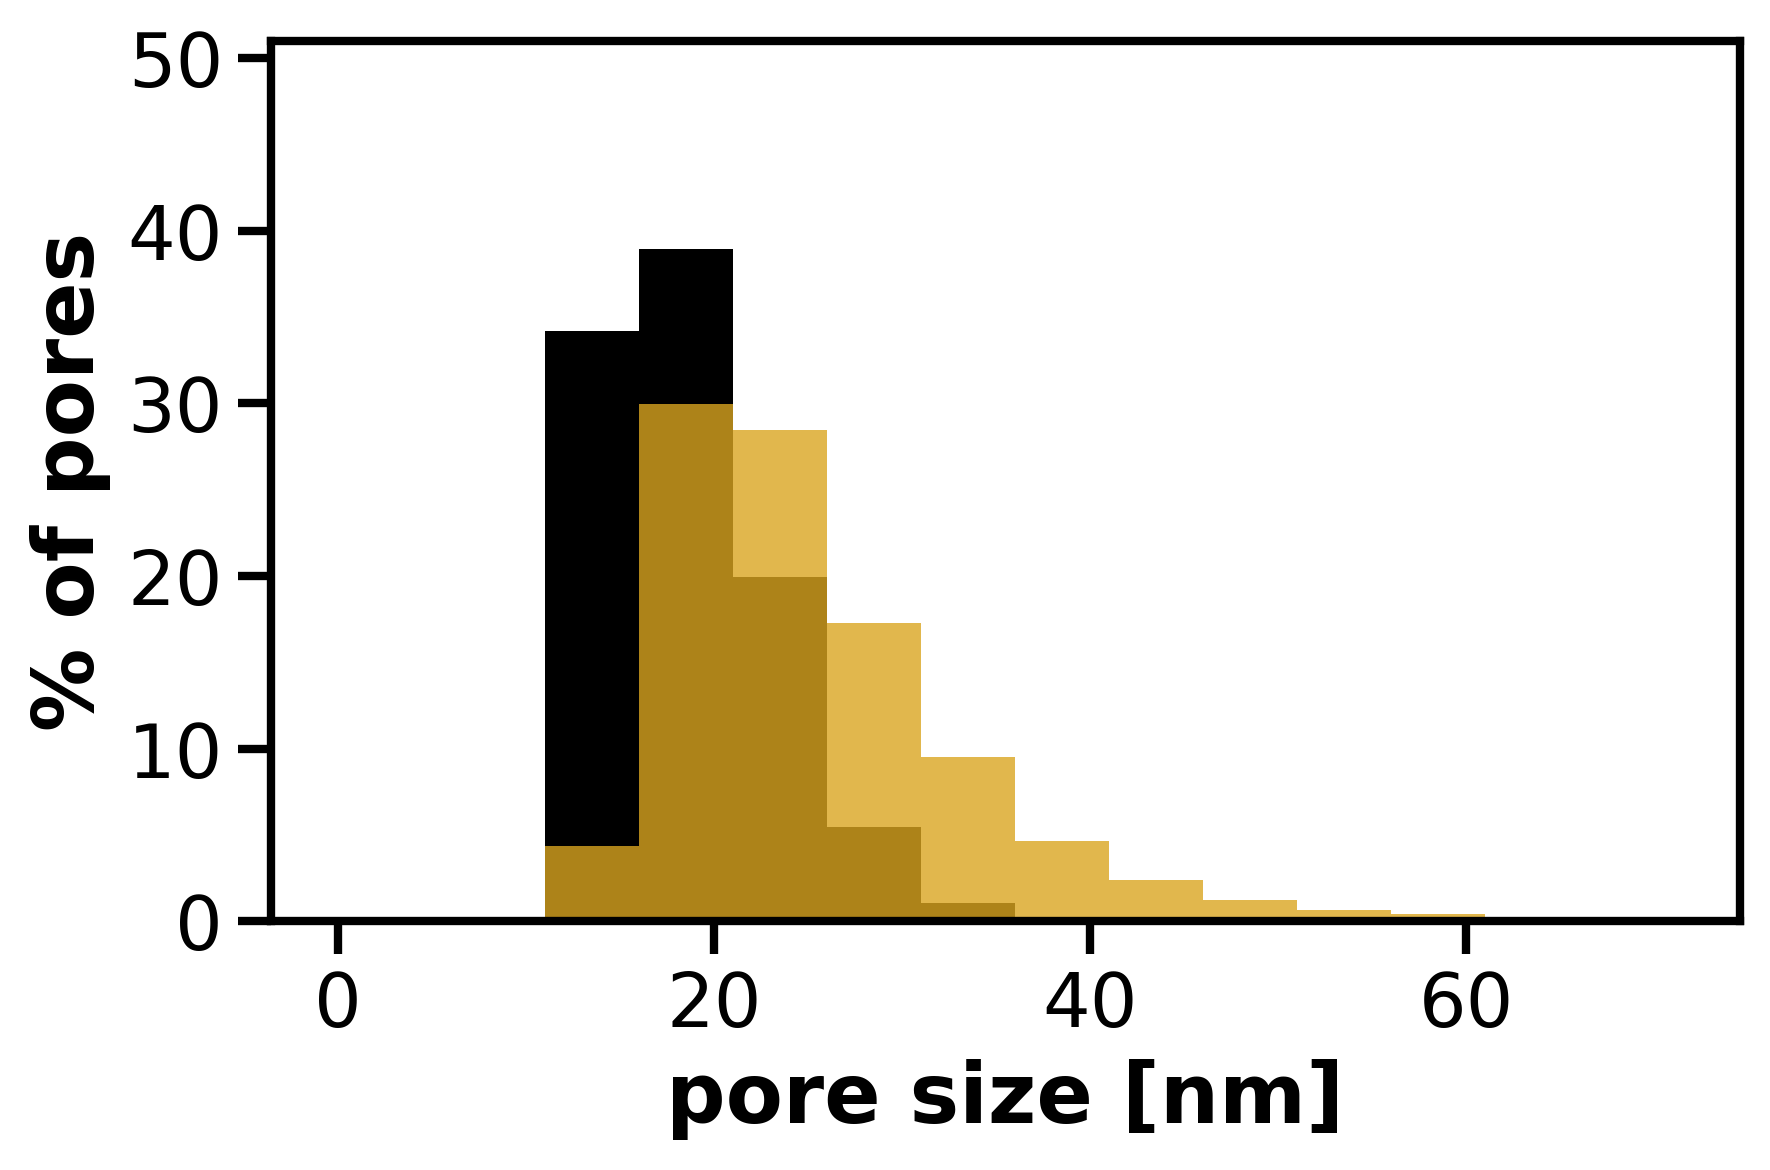

In [55]:
test_bins = np.linspace(1, 71, 15)

#NT_hist, NT_bins = np.histogram(Deff_vals_NT['Pore size [nm]'], density=1, bins=test_bins)
#OGD_3h_hist, OGD_3h_bins = np.histogram(Deff_vals_OGD_3h['Pore size [nm]'], density=1, bins=test_bins)

#NT_plot = Deff_vals_NT["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_NT.index) / len(Deff_vals_NT.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71],color='black')
#OGD_plot = Deff_vals_OGD_3h["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_OGD_3h.index) / len(Deff_vals_OGD_3h.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71], color='goldenrod')

plt.rc('axes', linewidth=2)
#NT_plot, OGD_3h_plot = NT_hist, OGD_3h_hist
bins = test_bins
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:])/2

plt.figure(1, dpi=300).tight_layout()
#plt.bar(center, NT_plot, color='black', align='center', width=width, alpha=0.8, label='NT')
NT_plot = Deff_vals_NT["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_NT.index) / len(Deff_vals_NT.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71],color='black',label='NT')
plt.ylim(0, 51)
plt.yticks(np.arange(0, 51, 10))
plt.ylabel('% of pores', fontsize=20, weight='bold')
plt.xlabel('pore size [nm]', fontsize=20, weight='bold')
plt.tick_params(labelsize=18, length=8, width=2)

plt.figure(1, dpi=300).tight_layout()
#plt.bar(center, OGD_3h_plot, color='goldenrod', align='center', width=width, alpha=1, label='OGD 3h')
OGD_plot = Deff_vals_OGD_3h["Pore size [nm]"].plot.hist(weights = np.ones_like(Deff_vals_OGD_3h.index) / len(Deff_vals_OGD_3h.index)*100, bins=[0,6,11,16,21,26,31,36,41,46,51,56,61,66,71], alpha = 0.8, color='goldenrod', label='OGD 3h')
plt.ylim(0, 51)
plt.yticks(np.arange(0, 51, 10))
plt.ylabel('% of pores', fontsize=20, weight='bold')
plt.xlabel('pore size [nm]', fontsize=20, weight='bold')
plt.tick_params(labelsize=18, length=8, width=2)

#plt.legend(fontsize='x-large', loc=1)
plt.show()

In [15]:
Deff_vals_NT

Deff [um^2/s]  Pore size [nm]
0           0.084729       21.183102
1           0.005826       16.704596
2           0.017661       18.200844
3           0.050589       20.051309
4           0.000473       14.315316
...              ...             ...
89217       0.343001       25.535516
89218       0.024126       18.696772
89219       0.014486       17.904947
89220       0.058321       20.345721
89221       0.123907       22.147502

[89222 rows x 2 columns]

In [32]:
test_bins = np.linspace(1, 71, 15)

In [33]:
test_bins

array([ 1.,  6., 11., 16., 21., 26., 31., 36., 41., 46., 51., 56., 61.,
       66., 71.])